In [1]:
from PIL import Image, ImageDraw
import random
import os
import pandas as pd
import numpy as np


def normalize_image(image):
    """
    Normaliza una imagen dividiendo los valores de píxeles por 255 para que estén en el rango [0, 1].
    """
    return np.array(image, dtype=np.float32) / 255.0

def add_anomaly(image,square_size=32):
  draw = ImageDraw.Draw(image)
  num_circles = random.randint(1, 3)  # Entre 1 y 3 círculos por cuadrado
  for _ in range(num_circles):
      r = random.randint(1, square_size//2)
      cx = random.randint(r, square_size-r)
      cy = random.randint(r, square_size-r)

      draw.ellipse([(cx - r, cy - r), (cx + r, cy + r)], fill=0)

  return image

def create_blank_image(width, height, anomaly_percentage=0, dataset_path="dataset",square_size=32):
    random.seed(42)  # Para reproducibilidad
    """
    Crea una imagen en blanco con el tamaño especificado y la divide en cuadrados de 32x32 píxeles.
    Algunas de estas celdas contendrán anomalías en forma de círculos negros y se almacenarán en un dataset etiquetado.
    :param width: Ancho de la imagen en píxeles.
    :param height: Alto de la imagen en píxeles.
    :param color: Color de fondo (por defecto blanco RGB).
    :param anomaly_percentage: Porcentaje de cuadrados que contendrán anomalías.
    :param dataset_path: Ruta donde se guardará el dataset.
    """
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path)

    image = Image.new("L", (width, height), 255)
    dataset = []

    for x in range(0, width, square_size):
        for y in range(0, height, square_size):
          label = 0
          square_img = image.crop((x, y, x + square_size, y + square_size))
          numero_aleatorio = random.random()
          if numero_aleatorio < anomaly_percentage:
            square_img = add_anomaly(square_img,square_size)
            label = 1

          square_filename = f"square_{x}_{y}.png"
          square_img.save(square_filename)
          dataset.append((square_filename, label))
    dataset = pd.DataFrame(dataset, columns=["filename", "label"])

    dataset.to_csv(os.path.join(dataset_path, "dataset_labels.csv"), index=False)



#img.show()  # Muestra la imagen
#img.save("blank_image.png")  # Guarda la imagen como archivo


In [2]:
from PIL import Image, ImageDraw
import random
import os
import pandas as pd
import numpy as np


def normalize_image(image):
    """Convierte una imagen PIL a array float32 normalizado [0, 1]."""
    return np.array(image, dtype=np.float32) / 255.0

def add_anomaly(image, square_size=32):
    """Dibuja de 1 a 3 círculos negros aleatorios en un parche dado."""
    draw = ImageDraw.Draw(image)
    num_circles = random.randint(1, 3)
    for _ in range(num_circles):
        r = random.randint(1, square_size // 2)
        cx = random.randint(r, square_size - r)
        cy = random.randint(r, square_size - r)
        draw.ellipse([(cx - r, cy - r), (cx + r, cy + r)], fill=(255, 0, 0) if image.mode == "RGB" else 0)
    return image

def patch_image_with_anomalies(input_image_path, anomaly_percentage=0.1, square_size=32, dataset_path="patched_dataset"):

    random.seed(42)  # Para reproducibilidad
    """
    Divide una imagen PNG en parches y añade anomalías a un porcentaje de ellos, guardando las imágenes y etiquetas.

    :param input_image_path: Ruta de la imagen original.
    :param anomaly_percentage: Porcentaje de parches con anomalías.
    :param square_size: Tamaño del parche (en píxeles).
    :param dataset_path: Carpeta donde se guardarán los parches y el CSV.
    """
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path)

    image = Image.open(input_image_path)
    width, height = image.size
    dataset = []

    for x in range(0, width, square_size):
        for y in range(0, height, square_size):
            label = 0
            square_img = image.crop((x, y, x + square_size, y + square_size))
            if random.random() < anomaly_percentage:
                square_img = add_anomaly(square_img, square_size)
                label = 1

            square_filename = f"square_{x}_{y}.jpg"
            square_path = os.path.join(dataset_path, square_filename)
            square_img.save(square_path, "JPEG")
            dataset.append((square_filename, label))

    df = pd.DataFrame(dataset, columns=["filename", "label"])
    df.to_csv(os.path.join(dataset_path, "dataset_labels.csv"), index=False)
    print(f"Dataset generado: {len(dataset)} parches. Anomalías: {df['label'].sum()}")




In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Ejecutar una u otra en función de que experimentos hacer
img = create_blank_image(2048, 2048, anomaly_percentage=0.2)  
#img= patch_image_with_anomalies("pexels-pixmike-413195.jpg", anomaly_percentage=0.05)

# Cargar el dataset desde el archivo CSV
dataset_path = "dataset/dataset_labels.csv"
df = pd.read_csv(dataset_path)

# Cargar el dataset desde el archivo CSV
#dataset_path = "patched_dataset/dataset_labels.csv"
#df = pd.read_csv(dataset_path)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train.to_csv(os.path.join("entrenamiento", "entrenamiento_etiquetas.csv"), index=False)
df_test.to_csv(os.path.join("test", "test_etiquetas.csv"), index=False)

# Mostrar las primeras filas del dataset
print(df.head(52))
random.seed(42)  # Para reproducibilidad
print(df_train.head(10))
print(df_test.head(10))
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train = df_train["filename"]
y_train = df_train["label"]
X_test =  df_test["filename"]
y_test = df_test["label"]
# Mostrar las primeras filas del conjunto de entrenamiento
print("Conjunto de entrenamiento:")
print(X_train.head(10))
print("Conjunto de prueba:")
print(X_test.head(10))

print(f"Total de imagenes en el conjunto de entrenamiento: {len(X_train)}")
print(f"Total de imagenes en el conjunto de prueba: {len(X_test)}")



df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train = df_train["filename"]
y_train = df_train["label"]
X_val =  df_val["filename"]
y_val = df_val["label"]

print(df_train[df_train["label"] == 0].shape[0]/len(df_train))
print(df_train[df_train["label"] == 1].shape[0]/len(df_train))

print(df_val[df_val["label"] == 0].shape[0]/len(df_val))
print(df_val[df_val["label"] == 1].shape[0]/len(df_val))

print(df_test[df_test["label"] == 0].shape[0]/len(df_test))
print(df_test[df_test["label"] == 1].shape[0]/len(df_test))

# Mostrar las primeras filas del conjunto de entrenamiento
print("Conjunto de entrenamiento:")
print(X_train.head(10))
print("Conjunto de validación:")
print(X_val.head(10))

print(f"Total de imagenes en el conjunto de entrenamiento: {len(X_train)}")
print(f"Total de imagenes en el conjunto de validación: {len(X_val)}")

# Calcular cantidades y porcentajes
normal_count = df[df["label"] == 0].shape[0]
anomalous_count = df[df["label"] == 1].shape[0]
total_count = len(df)

normal_percentage = (normal_count / total_count) * 100
anomalous_percentage = (anomalous_count / total_count) * 100

# Obtener los índices de las imágenes anómalas (donde label == "anomalous")
anomalous_data = df[df["label"] == 1][["filename"]]
anomalous_filenames = anomalous_data["filename"].tolist()

# Mostrar los índices de las imágenes anómalas
print(anomalous_filenames)

# Mostrar resultados
print(f"Total de imágenes: {total_count}")
print(f"Porcentaje de normales: {normal_percentage:.2f}%")
print(f"Porcentaje de anómalos: {anomalous_percentage:.2f}%")

train_indices = df_train.index.to_numpy()
val_indices = df_val.index.to_numpy()
test_indices = df_test.index.to_numpy()

             filename  label
0      square_0_0.png      0
1     square_0_32.png      1
2     square_0_64.png      0
3     square_0_96.png      1
4    square_0_128.png      0
5    square_0_160.png      0
6    square_0_192.png      0
7    square_0_224.png      0
8    square_0_256.png      0
9    square_0_288.png      0
10   square_0_320.png      0
11   square_0_352.png      0
12   square_0_384.png      0
13   square_0_416.png      1
14   square_0_448.png      1
15   square_0_480.png      0
16   square_0_512.png      0
17   square_0_544.png      0
18   square_0_576.png      0
19   square_0_608.png      0
20   square_0_640.png      0
21   square_0_672.png      0
22   square_0_704.png      0
23   square_0_736.png      0
24   square_0_768.png      0
25   square_0_800.png      0
26   square_0_832.png      1
27   square_0_864.png      0
28   square_0_896.png      0
29   square_0_928.png      0
30   square_0_960.png      0
31   square_0_992.png      1
32  square_0_1024.png      1
33  square_0_1

In [1]:
from torch.utils.data import Dataset

class EmbeddingDataset(Dataset):
    def __init__(self, paths, labels, indices,transform):
        self.paths = paths
        self.labels = labels
        self.indices = indices
        self.transform=transform

    def __len__(self):
        return len(self.paths)
    

    def __getitem__(self, idx):

        path = self.paths[idx]
        img = Image.open(str(path))
        img = self.transform(img)

        return img, self.labels[idx], self.indices[idx]

class EmbeddingDataset2(Dataset):
    def __init__(self, paths, labels, indices,transform):
        self.paths = paths
        self.labels = labels
        self.indices = indices
        self.transform=transform

    def __len__(self):
        return len(self.paths)
    

    def __getitem__(self, idx):

        path = self.paths[idx]
        img = Image.open(f"patched_dataset/{str(path)}")
        img = self.transform(img)

        return img, self.labels[idx], self.indices[idx]
    
class EmbeddingDataset3(Dataset):
    def __init__(self, paths, labels, indices,transform):
        self.paths = paths
        self.labels = labels
        self.indices = indices
        self.transform=transform

    def __len__(self):
        return len(self.paths)
    

    def __getitem__(self, idx):

        path = self.paths[idx]
        img = Image.open(f"imagenes_reales/{str(path)}")
        img = self.transform(img)

        return img, self.labels[idx], self.indices[idx]



Primer experimento imagen fondo blanco, puntos verdes

## Flatten

In [22]:
def flatten_image(image_path):
   img = Image.open(image_path)
   img_array = np.array(img)    # Convertir de una imagen PIL a un array para luego hacer el flatten
   flattened_image = img_array.flatten()
   return flattened_image

In [23]:
import torch

flattened_images = []
labels = []

for _, row in df.iterrows():
    image_path = row['filename']
    flattened_image = flatten_image(image_path)  # debe devolver un tensor
    flattened_tensor = torch.from_numpy(flattened_image)
    flattened_images.append(flattened_tensor)
    labels.append(row['label'])

# Convertimos la lista de tensores a un solo tensor
image_tensor = torch.stack(flattened_images)  # shape: [N, ...]


print(image_tensor.shape)  # Verificar la forma del tensor de imágenes
label_tensor = torch.tensor(labels)

print(image_tensor.shape)  # Verificar la forma del tensor

# Guardar como CSV
df_embeddings = pd.DataFrame(image_tensor.numpy())
df_embeddings['label'] = label_tensor.numpy()  # Añadir columna de etiquetas al final

df_embeddings.to_csv("tus_embeddings.csv", index=False)
print(" Embeddings guardados en 'tus_embeddings.csv'")

torch.Size([4096, 1024])
torch.Size([4096, 1024])
 Embeddings guardados en 'tus_embeddings.csv'


## Modelo preentrenado

In [24]:
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image


# Cargar modelo preentrenado ResNet-50
model = models.resnet50(pretrained=True)

# Eliminar la capa de clasificación (fc)
model = torch.nn.Sequential(*list(model.children())[:-1])

# Ver la arquitectura resultante
print(model)

model.eval()  # Poner en modo evaluación

# Transformaciones necesarias para ResNet-50
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar a 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # se usan estos valores por que son los que se usaron
                                                                                 # el entrenamiento de la resnet
])

# Lista para almacenar los embeddings
embeddings = []

# Iterar sobre las imágenes del dataset
for index, row in df.iterrows():
    image_path = row['filename']
    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    image = image.unsqueeze(0)   #añadir una dimension mas para el batch

    with torch.no_grad():      #deshabilita el calculo del gradiente
        embedding = model(image)
    embedding = embedding.squeeze().cpu().numpy()   #squeeze: elimina dimensiones de tamaño 1 del tensor
                                                    #cpu: mueve el tensor embedding a la gpu
                                                    #numpy: convierte a un array de numpy
    embeddings.append(embedding)

#Crear un DataFrame con los embeddings
embeddings_df = pd.DataFrame(embeddings)
embeddings_df['label'] = df['label']  # Agregar las etiquetas al nuevo dataset

# Guardar el DataFrame con los embeddings
embeddings_df.to_csv("embeddings.csv", index=False)



/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


## Autoencoder

In [25]:
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm
from PIL import Image
from torchinfo import summary
import torch


class Autoencoder(nn.Module):
    def __init__(self, input_channels=1, latent_channels=128):
        super(Autoencoder, self).__init__()

        # Encoder: 32x32 → 1x1 con 128 canales
        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1),  # 32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 16x16

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 16x16
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 8x8

            nn.Conv2d(64, 96, kernel_size=3, padding=1),  # 8x8
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 4x4

            nn.Conv2d(96, latent_channels, kernel_size=4),  # 4x4 → 1x1
            nn.ReLU()
        )

        # Decoder: 1x1 → 32x32 con 3 canales
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_channels, 96, kernel_size=4),  # 1x1 → 4x4
            nn.ReLU(),

            nn.ConvTranspose2d(96, 64, kernel_size=2, stride=2),  # 4x4 → 8x8
            nn.ReLU(),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),  # 8x8 → 16x16
            nn.ReLU(),

            nn.ConvTranspose2d(32, input_channels, kernel_size=2, stride=2),  # 16x16 → 32x32
            nn.Sigmoid()  # Para que la salida esté en [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)   # [B, 128, 1, 1]
        decoded = self.decoder(encoded)
        return decoded
    

# Prueba
x_test = torch.randn(1, 1, 32, 32)
model = Autoencoder()
output = model(x_test)
print("Dimensión final de salida:", output.shape)  # (1, 1, 32, 32)

summary(model,input_size=(1,1,32,32),device='cuda')





Dimensión final de salida: torch.Size([1, 1, 32, 32])


Layer (type:depth-idx)                   Output Shape              Param #
Autoencoder                              [1, 1, 32, 32]            --
├─Sequential: 1-1                        [1, 128, 1, 1]            --
│    └─Conv2d: 2-1                       [1, 32, 32, 32]           320
│    └─ReLU: 2-2                         [1, 32, 32, 32]           --
│    └─MaxPool2d: 2-3                    [1, 32, 16, 16]           --
│    └─Conv2d: 2-4                       [1, 64, 16, 16]           18,496
│    └─ReLU: 2-5                         [1, 64, 16, 16]           --
│    └─MaxPool2d: 2-6                    [1, 64, 8, 8]             --
│    └─Conv2d: 2-7                       [1, 96, 8, 8]             55,392
│    └─ReLU: 2-8                         [1, 96, 8, 8]             --
│    └─MaxPool2d: 2-9                    [1, 96, 4, 4]             --
│    └─Conv2d: 2-10                      [1, 128, 1, 1]            196,736
│    └─ReLU: 2-11                        [1, 128, 1, 1]            --
├

In [26]:
# Transformaciones 
transform = transforms.Compose([
    transforms.ToTensor()])

train_dataset = EmbeddingDataset(X_train.tolist(), y_train.tolist(), df_train.index.to_numpy(),transform)
imgs = [train_dataset[i][0] for i in range(len(train_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_train_encoder = torch.stack(imgs)

# Cargar y transformar todas las imágenes normales
val_dataset   = EmbeddingDataset(X_val.tolist(), y_val.tolist(), df_val.index.to_numpy(),transform)
imgs = [val_dataset[i][0] for i in range(len(val_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_val_encoder = torch.stack(imgs)

test_dataset  = EmbeddingDataset(X_test.tolist(), y_test.tolist(), df_test.index.to_numpy(),transform)
imgs = [test_dataset[i][0] for i in range(len(test_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_test_encoder = torch.stack(imgs)

In [27]:
from torch.utils.data import ConcatDataset
total_dataset= ConcatDataset([train_dataset, val_dataset, test_dataset])

print(total_dataset[0])

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), 1, 3383)


Entrenando Autoencoder con validación y early stopping...


Época 1/100: 100%|██████████| 21/21 [00:00<00:00, 82.26it/s]


Época [1/100], Pérdida entrenamiento: 0.219475, Pérdida validación: 0.211796


Época 2/100: 100%|██████████| 21/21 [00:00<00:00, 124.56it/s]


Época [2/100], Pérdida entrenamiento: 0.215002, Pérdida validación: 0.199593


Época 3/100: 100%|██████████| 21/21 [00:00<00:00, 123.75it/s]


Época [3/100], Pérdida entrenamiento: 0.190888, Pérdida validación: 0.158646


Época 4/100: 100%|██████████| 21/21 [00:00<00:00, 124.35it/s]


Época [4/100], Pérdida entrenamiento: 0.159683, Pérdida validación: 0.132039


Época 5/100: 100%|██████████| 21/21 [00:00<00:00, 124.01it/s]


Época [5/100], Pérdida entrenamiento: 0.131194, Pérdida validación: 0.104623


Época 6/100: 100%|██████████| 21/21 [00:00<00:00, 122.91it/s]


Época [6/100], Pérdida entrenamiento: 0.105939, Pérdida validación: 0.086228


Época 7/100: 100%|██████████| 21/21 [00:00<00:00, 122.05it/s]


Época [7/100], Pérdida entrenamiento: 0.083466, Pérdida validación: 0.068142


Época 8/100: 100%|██████████| 21/21 [00:00<00:00, 123.44it/s]


Época [8/100], Pérdida entrenamiento: 0.066787, Pérdida validación: 0.059025


Época 9/100: 100%|██████████| 21/21 [00:00<00:00, 123.87it/s]


Época [9/100], Pérdida entrenamiento: 0.059271, Pérdida validación: 0.055410


Época 10/100: 100%|██████████| 21/21 [00:00<00:00, 123.42it/s]


Época [10/100], Pérdida entrenamiento: 0.056441, Pérdida validación: 0.053029


Época 11/100: 100%|██████████| 21/21 [00:00<00:00, 123.06it/s]


Época [11/100], Pérdida entrenamiento: 0.053859, Pérdida validación: 0.051812


Época 12/100: 100%|██████████| 21/21 [00:00<00:00, 122.13it/s]


Época [12/100], Pérdida entrenamiento: 0.052790, Pérdida validación: 0.051052


Época 13/100: 100%|██████████| 21/21 [00:00<00:00, 122.48it/s]


Época [13/100], Pérdida entrenamiento: 0.051777, Pérdida validación: 0.050136


Época 14/100: 100%|██████████| 21/21 [00:00<00:00, 122.31it/s]


Época [14/100], Pérdida entrenamiento: 0.050352, Pérdida validación: 0.049278


Época 15/100: 100%|██████████| 21/21 [00:00<00:00, 123.03it/s]


Época [15/100], Pérdida entrenamiento: 0.049452, Pérdida validación: 0.048275


Época 16/100: 100%|██████████| 21/21 [00:00<00:00, 121.10it/s]


Época [16/100], Pérdida entrenamiento: 0.048899, Pérdida validación: 0.047755


Época 17/100: 100%|██████████| 21/21 [00:00<00:00, 121.81it/s]


Época [17/100], Pérdida entrenamiento: 0.048423, Pérdida validación: 0.047286


Época 18/100: 100%|██████████| 21/21 [00:00<00:00, 122.61it/s]


Época [18/100], Pérdida entrenamiento: 0.047666, Pérdida validación: 0.046708


Época 19/100: 100%|██████████| 21/21 [00:00<00:00, 122.65it/s]


Época [19/100], Pérdida entrenamiento: 0.046984, Pérdida validación: 0.046231


Época 20/100: 100%|██████████| 21/21 [00:00<00:00, 122.26it/s]


Época [20/100], Pérdida entrenamiento: 0.046473, Pérdida validación: 0.045637


Época 21/100: 100%|██████████| 21/21 [00:00<00:00, 121.98it/s]


Época [21/100], Pérdida entrenamiento: 0.046372, Pérdida validación: 0.045360


Época 22/100: 100%|██████████| 21/21 [00:00<00:00, 121.15it/s]


Época [22/100], Pérdida entrenamiento: 0.045365, Pérdida validación: 0.045029


Época 23/100: 100%|██████████| 21/21 [00:00<00:00, 122.18it/s]


Época [23/100], Pérdida entrenamiento: 0.044987, Pérdida validación: 0.044738


Época 24/100: 100%|██████████| 21/21 [00:00<00:00, 121.85it/s]


Época [24/100], Pérdida entrenamiento: 0.044973, Pérdida validación: 0.044400


Época 25/100: 100%|██████████| 21/21 [00:00<00:00, 121.07it/s]


Época [25/100], Pérdida entrenamiento: 0.044501, Pérdida validación: 0.044110


Época 26/100: 100%|██████████| 21/21 [00:00<00:00, 122.15it/s]


Época [26/100], Pérdida entrenamiento: 0.044307, Pérdida validación: 0.043952


Época 27/100: 100%|██████████| 21/21 [00:00<00:00, 111.28it/s]


Época [27/100], Pérdida entrenamiento: 0.043854, Pérdida validación: 0.043798


Época 28/100: 100%|██████████| 21/21 [00:00<00:00, 112.69it/s]


Época [28/100], Pérdida entrenamiento: 0.043705, Pérdida validación: 0.043637


Época 29/100: 100%|██████████| 21/21 [00:00<00:00, 111.88it/s]


Época [29/100], Pérdida entrenamiento: 0.043704, Pérdida validación: 0.043507


Época 30/100: 100%|██████████| 21/21 [00:00<00:00, 111.23it/s]


Época [30/100], Pérdida entrenamiento: 0.043602, Pérdida validación: 0.043309


Época 31/100: 100%|██████████| 21/21 [00:00<00:00, 111.42it/s]


Época [31/100], Pérdida entrenamiento: 0.043113, Pérdida validación: 0.043241


Época 32/100: 100%|██████████| 21/21 [00:00<00:00, 111.56it/s]


Época [32/100], Pérdida entrenamiento: 0.043186, Pérdida validación: 0.043181


Época 33/100: 100%|██████████| 21/21 [00:00<00:00, 112.72it/s]


Época [33/100], Pérdida entrenamiento: 0.043332, Pérdida validación: 0.043086


Época 34/100: 100%|██████████| 21/21 [00:00<00:00, 111.44it/s]


Época [34/100], Pérdida entrenamiento: 0.043173, Pérdida validación: 0.043002


Época 35/100: 100%|██████████| 21/21 [00:00<00:00, 111.34it/s]


Época [35/100], Pérdida entrenamiento: 0.043025, Pérdida validación: 0.042930


Época 36/100: 100%|██████████| 21/21 [00:00<00:00, 112.18it/s]


Época [36/100], Pérdida entrenamiento: 0.042765, Pérdida validación: 0.042881


Época 37/100: 100%|██████████| 21/21 [00:00<00:00, 111.14it/s]


Época [37/100], Pérdida entrenamiento: 0.042781, Pérdida validación: 0.042845


Época 38/100: 100%|██████████| 21/21 [00:00<00:00, 100.89it/s]


Época [38/100], Pérdida entrenamiento: 0.042695, Pérdida validación: 0.042810


Época 39/100: 100%|██████████| 21/21 [00:00<00:00, 97.13it/s]


Época [39/100], Pérdida entrenamiento: 0.042594, Pérdida validación: 0.042761


Época 40/100: 100%|██████████| 21/21 [00:00<00:00, 97.40it/s]


Época [40/100], Pérdida entrenamiento: 0.042750, Pérdida validación: 0.042730


Época 41/100: 100%|██████████| 21/21 [00:00<00:00, 95.58it/s]


Época [41/100], Pérdida entrenamiento: 0.042815, Pérdida validación: 0.042704


Época 42/100: 100%|██████████| 21/21 [00:00<00:00, 96.00it/s]


Época [42/100], Pérdida entrenamiento: 0.042661, Pérdida validación: 0.042684


Época 43/100: 100%|██████████| 21/21 [00:00<00:00, 95.57it/s]


Época [43/100], Pérdida entrenamiento: 0.042688, Pérdida validación: 0.042662


Época 44/100: 100%|██████████| 21/21 [00:00<00:00, 97.96it/s]


Época [44/100], Pérdida entrenamiento: 0.042367, Pérdida validación: 0.042649


Época 45/100: 100%|██████████| 21/21 [00:00<00:00, 96.81it/s]


Época [45/100], Pérdida entrenamiento: 0.042454, Pérdida validación: 0.042627


Época 46/100: 100%|██████████| 21/21 [00:00<00:00, 95.01it/s]


Época [46/100], Pérdida entrenamiento: 0.042565, Pérdida validación: 0.042620


Época 47/100: 100%|██████████| 21/21 [00:00<00:00, 98.96it/s]


Época [47/100], Pérdida entrenamiento: 0.042463, Pérdida validación: 0.042607


Época 48/100: 100%|██████████| 21/21 [00:00<00:00, 96.11it/s]


Época [48/100], Pérdida entrenamiento: 0.042726, Pérdida validación: 0.042600


Época 49/100: 100%|██████████| 21/21 [00:00<00:00, 98.88it/s]


Época [49/100], Pérdida entrenamiento: 0.042707, Pérdida validación: 0.042588


Época 50/100: 100%|██████████| 21/21 [00:00<00:00, 94.72it/s]


Época [50/100], Pérdida entrenamiento: 0.042660, Pérdida validación: 0.042581


Época 51/100: 100%|██████████| 21/21 [00:00<00:00, 99.27it/s]


Época [51/100], Pérdida entrenamiento: 0.042558, Pérdida validación: 0.042575


Época 52/100: 100%|██████████| 21/21 [00:00<00:00, 94.81it/s]


Época [52/100], Pérdida entrenamiento: 0.042620, Pérdida validación: 0.042570


Época 53/100: 100%|██████████| 21/21 [00:00<00:00, 95.53it/s]


Época [53/100], Pérdida entrenamiento: 0.042590, Pérdida validación: 0.042565


Época 54/100: 100%|██████████| 21/21 [00:00<00:00, 99.20it/s] 


Época [54/100], Pérdida entrenamiento: 0.042714, Pérdida validación: 0.042560


Época 55/100: 100%|██████████| 21/21 [00:00<00:00, 94.48it/s]


Época [55/100], Pérdida entrenamiento: 0.042496, Pérdida validación: 0.042556


Época 56/100: 100%|██████████| 21/21 [00:00<00:00, 96.74it/s]


Época [56/100], Pérdida entrenamiento: 0.042592, Pérdida validación: 0.042553


Época 57/100: 100%|██████████| 21/21 [00:00<00:00, 98.01it/s] 


Época [57/100], Pérdida entrenamiento: 0.042678, Pérdida validación: 0.042550


Época 58/100: 100%|██████████| 21/21 [00:00<00:00, 96.90it/s]


Época [58/100], Pérdida entrenamiento: 0.042486, Pérdida validación: 0.042548


Época 59/100: 100%|██████████| 21/21 [00:00<00:00, 98.19it/s]


Época [59/100], Pérdida entrenamiento: 0.042471, Pérdida validación: 0.042546


Época 60/100: 100%|██████████| 21/21 [00:00<00:00, 97.13it/s]


Época [60/100], Pérdida entrenamiento: 0.042529, Pérdida validación: 0.042543


Época 61/100: 100%|██████████| 21/21 [00:00<00:00, 94.55it/s]


Época [61/100], Pérdida entrenamiento: 0.042438, Pérdida validación: 0.042542


Época 62/100: 100%|██████████| 21/21 [00:00<00:00, 94.31it/s]


Época [62/100], Pérdida entrenamiento: 0.042556, Pérdida validación: 0.042541


Época 63/100: 100%|██████████| 21/21 [00:00<00:00, 99.26it/s]


Época [63/100], Pérdida entrenamiento: 0.042406, Pérdida validación: 0.042539


Época 64/100: 100%|██████████| 21/21 [00:00<00:00, 93.45it/s]


Época [64/100], Pérdida entrenamiento: 0.042387, Pérdida validación: 0.042538


Época 65/100: 100%|██████████| 21/21 [00:00<00:00, 96.21it/s]


Época [65/100], Pérdida entrenamiento: 0.042582, Pérdida validación: 0.042537


Época 66/100: 100%|██████████| 21/21 [00:00<00:00, 95.22it/s]


Época [66/100], Pérdida entrenamiento: 0.042572, Pérdida validación: 0.042536


Época 67/100: 100%|██████████| 21/21 [00:00<00:00, 98.57it/s]


Época [67/100], Pérdida entrenamiento: 0.042613, Pérdida validación: 0.042536


Época 68/100: 100%|██████████| 21/21 [00:00<00:00, 95.99it/s]


Época [68/100], Pérdida entrenamiento: 0.042411, Pérdida validación: 0.042535


Época 69/100: 100%|██████████| 21/21 [00:00<00:00, 97.92it/s]


Época [69/100], Pérdida entrenamiento: 0.042349, Pérdida validación: 0.042534


Época 70/100: 100%|██████████| 21/21 [00:00<00:00, 94.58it/s]


Época [70/100], Pérdida entrenamiento: 0.042431, Pérdida validación: 0.042534


Época 71/100: 100%|██████████| 21/21 [00:00<00:00, 106.14it/s]


Época [71/100], Pérdida entrenamiento: 0.042454, Pérdida validación: 0.042533


Época 72/100: 100%|██████████| 21/21 [00:00<00:00, 110.89it/s]


Época [72/100], Pérdida entrenamiento: 0.042661, Pérdida validación: 0.042533


Época 73/100: 100%|██████████| 21/21 [00:00<00:00, 109.11it/s]


Época [73/100], Pérdida entrenamiento: 0.042390, Pérdida validación: 0.042533


Época 74/100: 100%|██████████| 21/21 [00:00<00:00, 110.33it/s]


Época [74/100], Pérdida entrenamiento: 0.042506, Pérdida validación: 0.042532


Época 75/100: 100%|██████████| 21/21 [00:00<00:00, 109.36it/s]


Época [75/100], Pérdida entrenamiento: 0.042292, Pérdida validación: 0.042532


Época 76/100: 100%|██████████| 21/21 [00:00<00:00, 109.55it/s]


Época [76/100], Pérdida entrenamiento: 0.042605, Pérdida validación: 0.042532


Época 77/100: 100%|██████████| 21/21 [00:00<00:00, 110.37it/s]


Época [77/100], Pérdida entrenamiento: 0.042496, Pérdida validación: 0.042532


Época 78/100: 100%|██████████| 21/21 [00:00<00:00, 110.96it/s]


Época [78/100], Pérdida entrenamiento: 0.042505, Pérdida validación: 0.042532


Época 79/100: 100%|██████████| 21/21 [00:00<00:00, 111.03it/s]


Época [79/100], Pérdida entrenamiento: 0.042483, Pérdida validación: 0.042532


Época 80/100: 100%|██████████| 21/21 [00:00<00:00, 118.74it/s]


Época [80/100], Pérdida entrenamiento: 0.042366, Pérdida validación: 0.042531


Época 81/100: 100%|██████████| 21/21 [00:00<00:00, 118.54it/s]

Época [81/100], Pérdida entrenamiento: 0.042578, Pérdida validación: 0.042531



Época 82/100: 100%|██████████| 21/21 [00:00<00:00, 118.47it/s]


Época [82/100], Pérdida entrenamiento: 0.042373, Pérdida validación: 0.042531


Época 83/100: 100%|██████████| 21/21 [00:00<00:00, 118.31it/s]

Época [83/100], Pérdida entrenamiento: 0.042487, Pérdida validación: 0.042531



Época 84/100: 100%|██████████| 21/21 [00:00<00:00, 118.37it/s]

Época [84/100], Pérdida entrenamiento: 0.042689, Pérdida validación: 0.042531



Época 85/100: 100%|██████████| 21/21 [00:00<00:00, 118.09it/s]

Época [85/100], Pérdida entrenamiento: 0.042448, Pérdida validación: 0.042531



Época 86/100: 100%|██████████| 21/21 [00:00<00:00, 118.71it/s]


Época [86/100], Pérdida entrenamiento: 0.042553, Pérdida validación: 0.042531


Época 87/100: 100%|██████████| 21/21 [00:00<00:00, 118.05it/s]


Época [87/100], Pérdida entrenamiento: 0.042535, Pérdida validación: 0.042531


Época 88/100: 100%|██████████| 21/21 [00:00<00:00, 122.32it/s]


Época [88/100], Pérdida entrenamiento: 0.042523, Pérdida validación: 0.042531


Época 89/100: 100%|██████████| 21/21 [00:00<00:00, 121.96it/s]


Época [89/100], Pérdida entrenamiento: 0.042918, Pérdida validación: 0.042531


Época 90/100: 100%|██████████| 21/21 [00:00<00:00, 123.30it/s]


Época [90/100], Pérdida entrenamiento: 0.042711, Pérdida validación: 0.042531


Época 91/100: 100%|██████████| 21/21 [00:00<00:00, 122.18it/s]


Época [91/100], Pérdida entrenamiento: 0.042732, Pérdida validación: 0.042531


Época 92/100: 100%|██████████| 21/21 [00:00<00:00, 119.67it/s]


Época [92/100], Pérdida entrenamiento: 0.042513, Pérdida validación: 0.042531


Época 93/100: 100%|██████████| 21/21 [00:00<00:00, 121.55it/s]


Época [93/100], Pérdida entrenamiento: 0.042589, Pérdida validación: 0.042531


Época 94/100: 100%|██████████| 21/21 [00:00<00:00, 122.29it/s]


Época [94/100], Pérdida entrenamiento: 0.042897, Pérdida validación: 0.042531


Época 95/100: 100%|██████████| 21/21 [00:00<00:00, 121.48it/s]


Época [95/100], Pérdida entrenamiento: 0.042467, Pérdida validación: 0.042531


Época 96/100: 100%|██████████| 21/21 [00:00<00:00, 123.09it/s]


Época [96/100], Pérdida entrenamiento: 0.042640, Pérdida validación: 0.042531


Época 97/100: 100%|██████████| 21/21 [00:00<00:00, 120.81it/s]


Época [97/100], Pérdida entrenamiento: 0.042639, Pérdida validación: 0.042531


Época 98/100: 100%|██████████| 21/21 [00:00<00:00, 121.07it/s]


Época [98/100], Pérdida entrenamiento: 0.042405, Pérdida validación: 0.042531


Época 99/100: 100%|██████████| 21/21 [00:00<00:00, 123.05it/s]


Época [99/100], Pérdida entrenamiento: 0.042616, Pérdida validación: 0.042531


Época 100/100: 100%|██████████| 21/21 [00:00<00:00, 122.07it/s]


Época [100/100], Pérdida entrenamiento: 0.042755, Pérdida validación: 0.042531


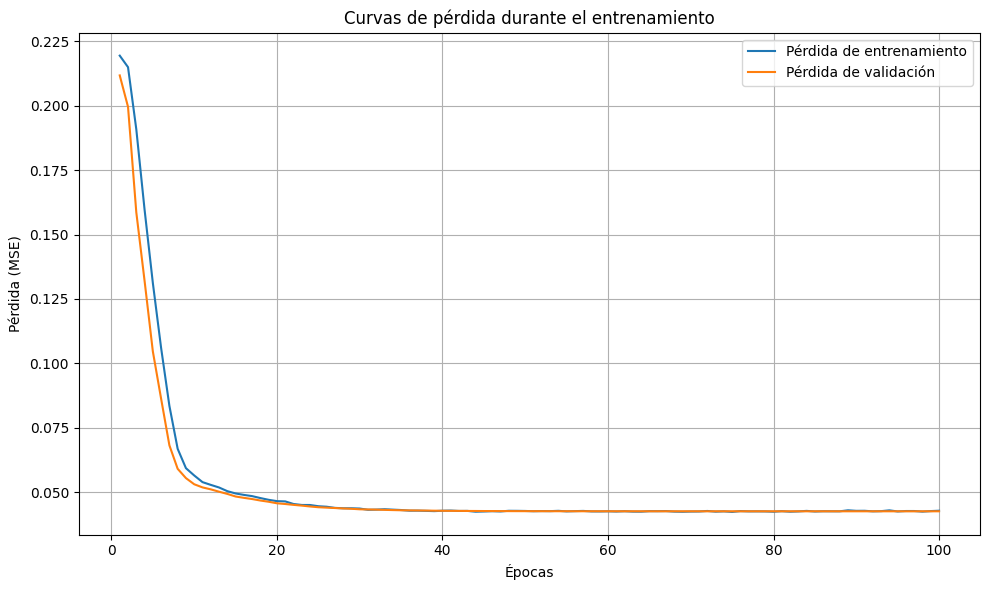

/var/tmp/ipykernel_408192/2328638315.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load("autoencoder_best.pth"))



Entrenamiento final sobre todos los datos (3 épocas)...


Fine-tuning Época 1/3: 100%|██████████| 26/26 [00:00<00:00, 121.30it/s]


Fine-tuning época [1/3], Pérdida: 0.042818


Fine-tuning Época 2/3: 100%|██████████| 26/26 [00:00<00:00, 120.60it/s]


Fine-tuning época [2/3], Pérdida: 0.042676


Fine-tuning Época 3/3: 100%|██████████| 26/26 [00:00<00:00, 120.17it/s]

Fine-tuning época [3/3], Pérdida: 0.042609

Modelo final guardado en autoencoder_final.pth


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR

# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hiperparámetros
batch_size = 128
learning_rate = 0.0001
num_epochs = 100
patience = 10  # Early stopping

# DataLoaders (asegúrate de que X_train_encoder y X_val_encoder están definidos)
train_loader = torch.utils.data.DataLoader(X_train_encoder, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val_encoder, batch_size=batch_size, shuffle=False)

# Modelo Autoencoder (definido previamente)
autoencoder = Autoencoder().to(device)

# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Variables de control
best_val_loss = float('inf')
epochs_without_improvement = 0

# Scheduler: reduce a la mitad cada 5 épocas
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

# Para la gráfica
train_losses = []
val_losses = []

# Entrenamiento
print("Entrenando Autoencoder con validación y early stopping...")
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for img in tqdm(train_loader, desc=f"Época {epoch+1}/{num_epochs}"):
        images = img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validación
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for img in val_loader:
            images = img.to(device)
            outputs = autoencoder(images)
            loss = criterion(outputs, images)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheduler.step()

    print(f"Época [{epoch+1}/{num_epochs}], Pérdida entrenamiento: {train_loss:.6f}, Pérdida validación: {val_loss:.6f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Deteniendo entrenamiento por early stopping (sin mejora en {patience} épocas).")
            break

# Gráfica de pérdidas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Pérdida de entrenamiento')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Curvas de pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Guardar el modelo mejor
torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
# Cargar el modelo guardado
autoencoder.load_state_dict(torch.load("autoencoder_best.pth"))

# Crear nuevo DataLoader con TODO el conjunto de entrenamiento y validación
full_dataset = torch.utils.data.ConcatDataset([X_train_encoder, X_val_encoder])
full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Entrenamiento final con todo el conjunto (1-3 épocas recomendadas)
final_epochs = 3
print(f"\nEntrenamiento final sobre todos los datos ({final_epochs} épocas)...")
autoencoder.train()

for epoch in range(final_epochs):
    running_loss = 0.0
    for img in tqdm(full_loader, desc=f"Fine-tuning Época {epoch+1}/{final_epochs}"):
        images = img[0].to(device) if isinstance(img, (tuple, list)) else img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Fine-tuning época [{epoch+1}/{final_epochs}], Pérdida: {running_loss / len(full_loader):.6f}")

# Guardar modelo final ajustado
final_model_path = "autoencoder_final.pth"
torch.save(autoencoder.state_dict(), final_model_path)
print(f"\nModelo final guardado en {final_model_path}")



In [29]:
# ==========================
# Cargar modelo y evaluar solo el Encoder
# ==========================

model = Autoencoder()
model.load_state_dict(torch.load(final_model_path))
model.eval()  # Modo evaluación

# Extraer solo el encoder
encoder = autoencoder.encoder
encoder.to(device)
encoder.eval()



embeddings = []
labels = []
indices = []

for img,label,idx in tqdm(total_dataset):
    with torch.no_grad():
        emb = encoder(img.unsqueeze(0).to(device))
    emb = emb.squeeze().cpu().numpy()
    embeddings.append(emb)
    labels.append(label)
    indices.append(idx)

# Procesar todas las imágenes en el dataset externo
print("Extrayendo embeddings...")


import pandas as pd
import numpy as np

# Crear DataFrame con todo
df_embeddings = pd.DataFrame(embeddings)
df_embeddings["label"] = labels
df_embeddings["index"] = indices

# Ordenar por el índice original del DataFrame
df_embeddings_sorted = df_embeddings.sort_values("index").set_index("index")

# Opcional: asegurarse de que alinea con df
df_embeddings_sorted = df_embeddings_sorted.reindex(df.index)

df_embeddings_sorted=df_embeddings_sorted[1:]

# Guardar
df_embeddings_sorted.to_csv("dataset_embeddings_encoder.csv")

/var/tmp/ipykernel_408192/4219918664.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(final_model_path))
  0%|          | 0/4096 [00:00<?

100%|██████████| 4096/4096 [00:03<00:00, 1256.97it/s]


Extrayendo embeddings...


## RESNET AUTOENCODER

In [30]:
import torch
import torch.nn as nn
import torchvision.models as models


class ViewLayer(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape

    def forward(self, x):
        return x.view(x.size(0), *self.shape)

class ResNetAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        resnet = models.resnet50(pretrained=True)

        # Congelar los parámetros del encoder preentrenado
        for param in list(resnet.children())[:8]:
            for p in param.parameters():
                p.requires_grad = False

        # Compacto: todas las capas convolucionales hasta layer4
        self.encoder = nn.Sequential(*list(resnet.children())[:8],
                                     nn.MaxPool2d(kernel_size=4,stride=1),
                                     nn.Flatten(),
                                     nn.Linear(2048,1024),
                                     nn.ReLU(),
                                     nn.Dropout(0.2),
                                     nn.Linear(1024, 256),
                                     nn.ReLU(),
                                     nn.Dropout(0.2),
                                     nn.Linear(256, 128),
                                     nn.ReLU())


        # Decoder: invertir el proceso usando conv transpuestas
        self.decoder = nn.Sequential(
            # Primero, expandimos [B, 64] → [B, 256]
            nn.Linear(128, 256),
            nn.ReLU(),

            # Expandimos más: [B, 256] → [B, 2048]
            nn.Linear(256, 2048*4*4),
            nn.ReLU(),
            ViewLayer((2048, 4, 4)),  # Cambiar la forma a [B, 2048, 4, 4]
            # Ahora, aplicamos las capas


            nn.ConvTranspose2d(2048, 512, kernel_size=4, stride=2, padding=1),  # -> [B, 512, 8, 8]
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),    # -> [B, 256, 32, 32]
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),     # -> [B, 64, 64, 64]
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),      # -> [B, 64, 128, 128]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),       # -> [B, 3, 128, 128]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Prueba con un tensor de entrada (batch_size=1, canal=3, 28x28)
x_test = torch.randn(1, 3, 128, 128)

# Inicializar modelo y obtener salida
model = ResNetAutoencoder()
output = model(x_test)
print(model.state_dict)
output_encoder=model.encoder(x_test)

# Imprimir dimensiones de salida
print("Dimensión final de salida:", output.shape)  # Esperado: (1, 1, 28, 28)
print("Dimensión final de salida encoder:", output_encoder.shape)  # Esperado: (1, 1, 28, 28)

from torchinfo import summary
# Resumen del modelo
summary(model, input_size=(1, 3, 128, 128), device='cuda')


/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<bound method Module.state_dict of ResNetAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsa

Layer (type:depth-idx)                        Output Shape              Param #
ResNetAutoencoder                             [1, 3, 128, 128]          --
├─Sequential: 1-1                             [1, 128]                  --
│    └─Conv2d: 2-1                            [1, 64, 64, 64]           (9,408)
│    └─BatchNorm2d: 2-2                       [1, 64, 64, 64]           (128)
│    └─ReLU: 2-3                              [1, 64, 64, 64]           --
│    └─MaxPool2d: 2-4                         [1, 64, 32, 32]           --
│    └─Sequential: 2-5                        [1, 256, 32, 32]          --
│    │    └─Bottleneck: 3-1                   [1, 256, 32, 32]          (75,008)
│    │    └─Bottleneck: 3-2                   [1, 256, 32, 32]          (70,400)
│    │    └─Bottleneck: 3-3                   [1, 256, 32, 32]          (70,400)
│    └─Sequential: 2-6                        [1, 512, 16, 16]          --
│    │    └─Bottleneck: 3-4                   [1, 512, 16, 16]       

In [31]:
import torchvision.transforms as transforms
import torch
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Lambda(lambda img: img.convert("RGB")),  # <--- convierte a RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


train_dataset = EmbeddingDataset(X_train.tolist(), y_train.tolist(), df_train.index.to_numpy(),transform)
imgs = [train_dataset[i][0] for i in range(len(train_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_train_resnet = torch.stack(imgs)

# Cargar y transformar todas las imágenes normales
val_dataset   = EmbeddingDataset(X_val.tolist(), y_val.tolist(), df_val.index.to_numpy(),transform)
imgs = [val_dataset[i][0] for i in range(len(val_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_val_resnet = torch.stack(imgs)

test_dataset  = EmbeddingDataset(X_test.tolist(), y_test.tolist(), df_test.index.to_numpy(),transform)
imgs = [test_dataset[i][0] for i in range(len(test_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_test_resnet  = torch.stack(imgs)

In [32]:
from torch.utils.data import ConcatDataset


total_dataset= ConcatDataset([train_dataset, val_dataset, test_dataset])

Entrenando Autoencoder con validación y early stopping...


Época 1/100: 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]


Época [1/100], Pérdida entrenamiento: 4.866538, Pérdida validación: 3.609953


Época 2/100: 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]


Época [2/100], Pérdida entrenamiento: 2.827856, Pérdida validación: 2.314022


Época 3/100: 100%|██████████| 21/21 [00:07<00:00,  2.77it/s]


Época [3/100], Pérdida entrenamiento: 2.393910, Pérdida validación: 2.052355


Época 4/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [4/100], Pérdida entrenamiento: 2.137411, Pérdida validación: 1.759594


Época 5/100: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]


Época [5/100], Pérdida entrenamiento: 1.883410, Pérdida validación: 1.622194


Época 6/100: 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]


Época [6/100], Pérdida entrenamiento: 1.747951, Pérdida validación: 1.523183


Época 7/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [7/100], Pérdida entrenamiento: 1.585971, Pérdida validación: 1.210728


Época 8/100: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


Época [8/100], Pérdida entrenamiento: 1.160440, Pérdida validación: 1.055363


Época 9/100: 100%|██████████| 21/21 [00:07<00:00,  2.77it/s]


Época [9/100], Pérdida entrenamiento: 1.032693, Pérdida validación: 0.934367


Época 10/100: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


Época [10/100], Pérdida entrenamiento: 0.974228, Pérdida validación: 0.904450


Época 11/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [11/100], Pérdida entrenamiento: 0.940885, Pérdida validación: 0.882356


Época 12/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [12/100], Pérdida entrenamiento: 0.967921, Pérdida validación: 0.924029


Época 13/100: 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]


Época [13/100], Pérdida entrenamiento: 0.973061, Pérdida validación: 0.892343


Época 14/100: 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]


Época [14/100], Pérdida entrenamiento: 0.914391, Pérdida validación: 0.851808


Época 15/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [15/100], Pérdida entrenamiento: 0.881405, Pérdida validación: 0.842438


Época 16/100: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


Época [16/100], Pérdida entrenamiento: 0.866294, Pérdida validación: 0.818753


Época 17/100: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


Época [17/100], Pérdida entrenamiento: 0.831794, Pérdida validación: 0.783316


Época 18/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [18/100], Pérdida entrenamiento: 0.808716, Pérdida validación: 0.739360


Época 19/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [19/100], Pérdida entrenamiento: 0.753335, Pérdida validación: 0.721373


Época 20/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [20/100], Pérdida entrenamiento: 0.714253, Pérdida validación: 0.653262


Época 21/100: 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]


Época [21/100], Pérdida entrenamiento: 0.664195, Pérdida validación: 0.602771


Época 22/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [22/100], Pérdida entrenamiento: 0.600157, Pérdida validación: 0.608059


Época 23/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [23/100], Pérdida entrenamiento: 0.633203, Pérdida validación: 0.587966


Época 24/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [24/100], Pérdida entrenamiento: 0.580082, Pérdida validación: 0.651865


Época 25/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [25/100], Pérdida entrenamiento: 0.598762, Pérdida validación: 0.541030


Época 26/100: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


Época [26/100], Pérdida entrenamiento: 0.570457, Pérdida validación: 0.528533


Época 27/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [27/100], Pérdida entrenamiento: 0.518142, Pérdida validación: 0.522133


Época 28/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [28/100], Pérdida entrenamiento: 0.518165, Pérdida validación: 0.527157


Época 29/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [29/100], Pérdida entrenamiento: 0.506105, Pérdida validación: 0.546628


Época 30/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [30/100], Pérdida entrenamiento: 0.517342, Pérdida validación: 0.490338


Época 31/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [31/100], Pérdida entrenamiento: 0.501150, Pérdida validación: 0.518981


Época 32/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [32/100], Pérdida entrenamiento: 0.500292, Pérdida validación: 0.503407


Época 33/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [33/100], Pérdida entrenamiento: 0.476948, Pérdida validación: 0.499614


Época 34/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [34/100], Pérdida entrenamiento: 0.471472, Pérdida validación: 0.497523


Época 35/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [35/100], Pérdida entrenamiento: 0.467851, Pérdida validación: 0.487178


Época 36/100: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


Época [36/100], Pérdida entrenamiento: 0.465485, Pérdida validación: 0.501715


Época 37/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [37/100], Pérdida entrenamiento: 0.452978, Pérdida validación: 0.467233


Época 38/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [38/100], Pérdida entrenamiento: 0.432200, Pérdida validación: 0.482324


Época 39/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [39/100], Pérdida entrenamiento: 0.432284, Pérdida validación: 0.453680


Época 40/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [40/100], Pérdida entrenamiento: 0.429077, Pérdida validación: 0.464570


Época 41/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [41/100], Pérdida entrenamiento: 0.415093, Pérdida validación: 0.443506


Época 42/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [42/100], Pérdida entrenamiento: 0.422717, Pérdida validación: 0.446813


Época 43/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [43/100], Pérdida entrenamiento: 0.412829, Pérdida validación: 0.569595


Época 44/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [44/100], Pérdida entrenamiento: 0.455327, Pérdida validación: 0.432062


Época 45/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [45/100], Pérdida entrenamiento: 0.421397, Pérdida validación: 0.444763


Época 46/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [46/100], Pérdida entrenamiento: 0.411490, Pérdida validación: 0.447329


Época 47/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [47/100], Pérdida entrenamiento: 0.397786, Pérdida validación: 0.415241


Época 48/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [48/100], Pérdida entrenamiento: 0.375258, Pérdida validación: 0.456918


Época 49/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [49/100], Pérdida entrenamiento: 0.394525, Pérdida validación: 0.423226


Época 50/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [50/100], Pérdida entrenamiento: 0.380259, Pérdida validación: 0.424994


Época 51/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [51/100], Pérdida entrenamiento: 0.371598, Pérdida validación: 0.436926


Época 52/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [52/100], Pérdida entrenamiento: 0.384472, Pérdida validación: 0.412060


Época 53/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [53/100], Pérdida entrenamiento: 0.378009, Pérdida validación: 0.457068


Época 54/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [54/100], Pérdida entrenamiento: 0.364200, Pérdida validación: 0.402908


Época 55/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [55/100], Pérdida entrenamiento: 0.355726, Pérdida validación: 0.400793


Época 56/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [56/100], Pérdida entrenamiento: 0.369398, Pérdida validación: 0.425963


Época 57/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [57/100], Pérdida entrenamiento: 0.363789, Pérdida validación: 0.434363


Época 58/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [58/100], Pérdida entrenamiento: 0.349542, Pérdida validación: 0.404154


Época 59/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [59/100], Pérdida entrenamiento: 0.344610, Pérdida validación: 0.425333


Época 60/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [60/100], Pérdida entrenamiento: 0.342577, Pérdida validación: 0.389683


Época 61/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [61/100], Pérdida entrenamiento: 0.379840, Pérdida validación: 0.415957


Época 62/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [62/100], Pérdida entrenamiento: 0.341710, Pérdida validación: 0.408347


Época 63/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [63/100], Pérdida entrenamiento: 0.337871, Pérdida validación: 0.387189


Época 64/100: 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


Época [64/100], Pérdida entrenamiento: 0.333555, Pérdida validación: 0.403632


Época 65/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [65/100], Pérdida entrenamiento: 0.331277, Pérdida validación: 0.468676


Época 66/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [66/100], Pérdida entrenamiento: 0.334593, Pérdida validación: 0.390528


Época 67/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [67/100], Pérdida entrenamiento: 0.327079, Pérdida validación: 0.379740


Época 68/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [68/100], Pérdida entrenamiento: 0.320467, Pérdida validación: 0.422112


Época 69/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [69/100], Pérdida entrenamiento: 0.316637, Pérdida validación: 0.421352


Época 70/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [70/100], Pérdida entrenamiento: 0.322433, Pérdida validación: 0.393217


Época 71/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [71/100], Pérdida entrenamiento: 0.302005, Pérdida validación: 0.376041


Época 72/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [72/100], Pérdida entrenamiento: 0.300352, Pérdida validación: 0.358545


Época 73/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [73/100], Pérdida entrenamiento: 0.309023, Pérdida validación: 0.414177


Época 74/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [74/100], Pérdida entrenamiento: 0.295254, Pérdida validación: 0.374496


Época 75/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [75/100], Pérdida entrenamiento: 0.305212, Pérdida validación: 0.407149


Época 76/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [76/100], Pérdida entrenamiento: 0.303169, Pérdida validación: 0.379736


Época 77/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [77/100], Pérdida entrenamiento: 0.283398, Pérdida validación: 0.368477


Época 78/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [78/100], Pérdida entrenamiento: 0.277374, Pérdida validación: 0.352865


Época 79/100: 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


Época [79/100], Pérdida entrenamiento: 0.295826, Pérdida validación: 0.399134


Época 80/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [80/100], Pérdida entrenamiento: 0.297720, Pérdida validación: 0.353580


Época 81/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [81/100], Pérdida entrenamiento: 0.272148, Pérdida validación: 0.365970


Época 82/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [82/100], Pérdida entrenamiento: 0.267136, Pérdida validación: 0.376494


Época 83/100: 100%|██████████| 21/21 [00:07<00:00,  2.72it/s]


Época [83/100], Pérdida entrenamiento: 0.270365, Pérdida validación: 0.367016


Época 84/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [84/100], Pérdida entrenamiento: 0.268617, Pérdida validación: 0.357819


Época 85/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [85/100], Pérdida entrenamiento: 0.271699, Pérdida validación: 0.356779


Época 86/100: 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]


Época [86/100], Pérdida entrenamiento: 0.261748, Pérdida validación: 0.364851


Época 87/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [87/100], Pérdida entrenamiento: 0.272483, Pérdida validación: 0.370598


Época 88/100: 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


Época [88/100], Pérdida entrenamiento: 0.260428, Pérdida validación: 0.365676
Deteniendo entrenamiento por early stopping (sin mejora en 10 épocas).


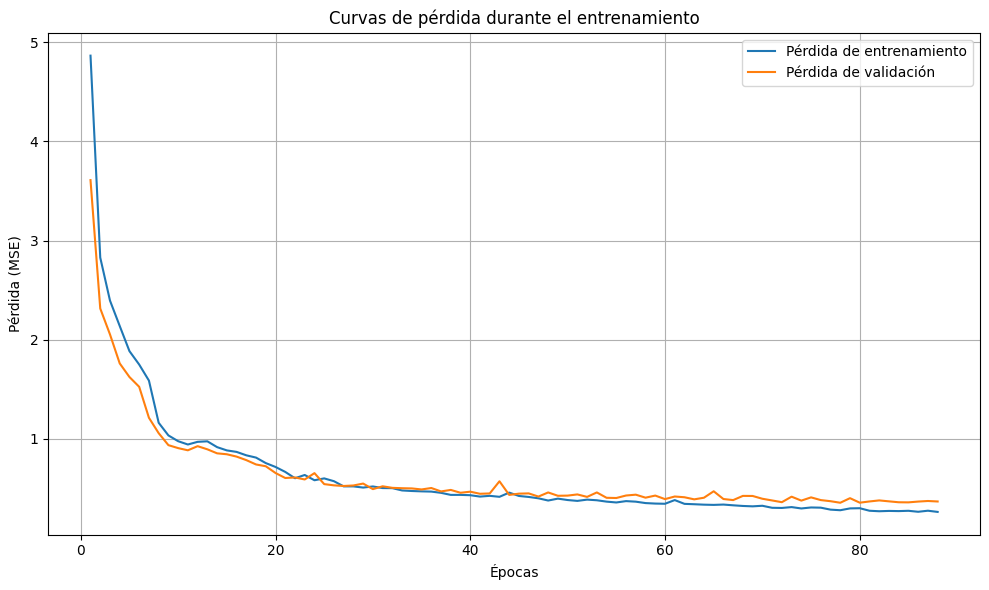

/var/tmp/ipykernel_408192/3887174518.py:95: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load("autoencoder_resnet_best.pth"))



Entrenamiento final sobre todos los datos (3 épocas)...


Fine-tuning Época 1/3: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]


Fine-tuning época [1/3], Pérdida: 0.302847


Fine-tuning Época 2/3: 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]


Fine-tuning época [2/3], Pérdida: 0.287685


Fine-tuning Época 3/3: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]


Fine-tuning época [3/3], Pérdida: 0.289877

Modelo final guardado en autoencoder_resnet_codificacion_final.pth


In [ ]:


# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Hiperparámetros
batch_size = 128
learning_rate = 0.0001
num_epochs = 100
patience = 10  # Early stopping
patience = 10  # Early stopping

# DataLoaders (asegúrate de que X_train_encoder y X_val_encoder están definidos)
train_loader = torch.utils.data.DataLoader(X_train_resnet, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val_resnet, batch_size=batch_size, shuffle=False)

# Crear instancia del Autoencoder
autoencoder = ResNetAutoencoder().to(device)

# Definir función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Variables de control
best_val_loss = float('inf')
epochs_without_improvement = 0

# Para la gráfica
train_losses = []
val_losses = []
scheluder= StepLR(optimizer, step_size=5, gamma=0.5)

# Entrenamiento
print("Entrenando Autoencoder con validación y early stopping...")
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for img in tqdm(train_loader, desc=f"Época {epoch+1}/{num_epochs}"):
        images = img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validación
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for img in val_loader:
            images = img.to(device)
            outputs = autoencoder(images)
            loss = criterion(outputs, images)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheluder.step

    print(f"Época [{epoch+1}/{num_epochs}], Pérdida entrenamiento: {train_loss:.6f}, Pérdida validación: {val_loss:.6f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Deteniendo entrenamiento por early stopping (sin mejora en {patience} épocas).")
            break

# Gráfica de pérdidas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Pérdida de entrenamiento')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Curvas de pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Guardar el modelo mejor
torch.save(autoencoder.state_dict(), "autoencoder_resnet_best.pth")
# Cargar el modelo guardado
autoencoder.load_state_dict(torch.load("autoencoder_resnet_best.pth"))

# Crear nuevo DataLoader con TODO el conjunto de entrenamiento y validación
full_dataset = torch.utils.data.ConcatDataset([X_train_resnet, X_val_resnet])
full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Entrenamiento final con todo el conjunto (1-3 épocas recomendadas)
final_epochs = 3
print(f"\nEntrenamiento final sobre todos los datos ({final_epochs} épocas)...")
autoencoder.train()

for epoch in range(final_epochs):
    running_loss = 0.0
    for img in tqdm(full_loader, desc=f"Fine-tuning Época {epoch+1}/{final_epochs}"):
        images = img[0].to(device) if isinstance(img, (tuple, list)) else img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Fine-tuning época [{epoch+1}/{final_epochs}], Pérdida: {running_loss / len(full_loader):.6f}")

# Guardar modelo final ajustado
final_model_path = "autoencoder_resnet_codificacion_final.pth"
torch.save(autoencoder.state_dict(), final_model_path)
print(f"\nModelo final guardado en {final_model_path}")




In [34]:
# ==========================
# Cargar modelo y evaluar solo el Encoder
# ==========================

# Cargar el modelo entrenado
model = ResNetAutoencoder()
model.load_state_dict(torch.load("autoencoder_resnet_codificacion_final.pth"))
model.eval()  # Modo evaluación

# Extraer solo el encoder
encoder = model.encoder
encoder.to(device)
encoder.eval()



# Lista para almacenar los embeddings
embeddings = []
labels=[]
indices=[]
for img, label, idx in tqdm(total_dataset):
    with torch.no_grad():
        emb = encoder(img.unsqueeze(0).to(device))
    emb = emb.squeeze().cpu().numpy()
    embeddings.append(emb)
    labels.append(label)
    indices.append(idx)

# Procesar todas las imágenes en el dataset externo
print("Extrayendo embeddings...")


import pandas as pd
import numpy as np

# Crear DataFrame con todo
df_embeddings = pd.DataFrame(embeddings)
df_embeddings["label"] = labels
df_embeddings["index"] = indices

# Ordenar por el índice original del DataFrame
df_embeddings_sorted = df_embeddings.sort_values("index").set_index("index")

# Opcional: asegurarse de que alinea con df
df_embeddings_sorted = df_embeddings_sorted.reindex(df.index)

df_embeddings_sorted=df_embeddings_sorted[1:]

# Guardar
df_embeddings_sorted.to_csv("dataset_embeddings_encoder_resnet.csv")

/var/tmp/ipykernel_408192/123725328.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("autoencoder_resnet_codificacion_final.pth"))
100%|█

Extrayendo embeddings...


## Flatten 2

In [61]:
def flatten_image(image_path):
    if os.path.exists(image_path):
        img = Image.open(image_path)
        img_array = np.array(img)
        flattened_image = img_array.flatten()
        return flattened_image
    else:
        print(f"El archivo {image_path} no se encuentra.")
        return None

In [62]:
import torch

flattened_images = []
labels = []

for _, row in df.iterrows():
    image_path = row['filename']
    flattened_image = flatten_image(f"patched_dataset/{image_path}")  # debe devolver un tensor
    flattened_tensor = torch.from_numpy(flattened_image)
    flattened_images.append(flattened_tensor)
    labels.append(row['label'])

# Convertimos la lista de tensores a un solo tensor
image_tensor = torch.stack(flattened_images)  # shape: [N, ...]


print(image_tensor.shape)  # Verificar la forma del tensor de imágenes

label_tensor = torch.tensor(labels)

print(image_tensor.shape)  # Verificar la forma del tensor

# Guardar como CSV
df_embeddings = pd.DataFrame(image_tensor.numpy())
df_embeddings['label'] = label_tensor.numpy()  # Añadir columna de etiquetas al final

df_embeddings.to_csv("tus_embeddings.csv", index=False)
print(" Embeddings guardados en 'tus_embeddings.csv'")

torch.Size([7854, 3072])
torch.Size([7854, 3072])
 Embeddings guardados en 'tus_embeddings.csv'


## Modelo preentrenado 2

In [63]:
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image


# Cargar modelo preentrenado ResNet-50
model = models.resnet50(pretrained=True)

# Eliminar la capa de clasificación (fc)
model = torch.nn.Sequential(*list(model.children())[:-1])

# Ver la arquitectura resultante
print(model)

model.eval()  # Poner en modo evaluación

# Transformaciones necesarias para ResNet-50
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar a 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # se usan estos valores por que son los que se usaron
                                                                                 # el entrenamiento de la resnet
])

# Lista para almacenar los embeddings
embeddings = []

# Iterar sobre las imágenes del dataset
for index, row in df.iterrows():
    image_path = row['filename']
    image = Image.open(f"patched_dataset/{image_path}")
    image = transform(image)
    image = image.unsqueeze(0)   #añadir una dimension mas para el batch

    with torch.no_grad():      #deshabilita el calculo del gradiente
        embedding = model(image)
    embedding = embedding.squeeze().cpu().numpy()   #squeeze: elimina dimensiones de tamaño 1 del tensor
                                                    #cpu: mueve el tensor embedding a la gpu
                                                    #numpy: convierte a un array de numpy
    embeddings.append(embedding)

#Crear un DataFrame con los embeddings
embeddings_df = pd.DataFrame(embeddings)
embeddings_df['label'] = df['label']  # Agregar las etiquetas al nuevo dataset

# Guardar el DataFrame con los embeddings
embeddings_df.to_csv("embeddings.csv", index=False)



/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


## Autoencoder 2

In [64]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_channels=3, latent_channels=128):
        super(Autoencoder, self).__init__()

        # Encoder: 32x32 → 1x1 con 128 canales
        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1),  # 32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 16x16

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 16x16
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 8x8

            nn.Conv2d(64, 96, kernel_size=3, padding=1),  # 8x8
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 4x4

            nn.Conv2d(96, latent_channels, kernel_size=4),  # 4x4 → 1x1
            nn.ReLU()
        )

        # Decoder: 1x1 → 32x32 con 3 canales
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_channels, 96, kernel_size=4),  # 1x1 → 4x4
            nn.ReLU(),

            nn.ConvTranspose2d(96, 64, kernel_size=2, stride=2),  # 4x4 → 8x8
            nn.ReLU(),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),  # 8x8 → 16x16
            nn.ReLU(),

            nn.ConvTranspose2d(32, input_channels, kernel_size=2, stride=2),  # 16x16 → 32x32
            nn.Sigmoid()  # Para que la salida esté en [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)   # [B, 128, 1, 1]
        decoded = self.decoder(encoded)
        return decoded
    

# Prueba
x_test = torch.randn(1, 3, 32, 32)
model = Autoencoder()
output = model(x_test)
print("Dimensión final de salida:", output.shape)  # (1, 1, 32, 32)


Dimensión final de salida: torch.Size([1, 3, 32, 32])


In [65]:
# Transformaciones
transform = transforms.Compose([
    transforms.ToTensor()
])


train_dataset = EmbeddingDataset2(X_train.tolist(), y_train.tolist(), df_train.index.to_numpy(),transform)
imgs = [train_dataset[i][0] for i in range(len(train_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_train_encoder = torch.stack(imgs)

# Cargar y transformar todas las imágenes normales
val_dataset   = EmbeddingDataset2(X_val.tolist(), y_val.tolist(), df_val.index.to_numpy(),transform)
imgs = [val_dataset[i][0] for i in range(len(val_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_val_encoder = torch.stack(imgs)

test_dataset  = EmbeddingDataset2(X_test.tolist(), y_test.tolist(), df_test.index.to_numpy(),transform)
imgs = [test_dataset[i][0] for i in range(len(test_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_test_encoder = torch.stack(imgs)

In [66]:
from torch.utils.data import ConcatDataset


total_dataset= ConcatDataset([train_dataset, val_dataset, test_dataset])

print(total_dataset[0])

(tensor([[[0.5059, 0.2667, 0.2588,  ..., 0.0980, 0.0000, 0.0000],
         [0.4000, 0.4471, 0.3294,  ..., 0.1686, 0.0275, 0.0000],
         [0.5098, 0.3922, 0.3647,  ..., 0.2471, 0.1451, 0.0078],
         ...,
         [0.3059, 0.3686, 0.4510,  ..., 0.2314, 0.2510, 0.2510],
         [0.2824, 0.3529, 0.4510,  ..., 0.3020, 0.2902, 0.2549],
         [0.1608, 0.2863, 0.4902,  ..., 0.2706, 0.3098, 0.3216]],

        [[0.7843, 0.6157, 0.7412,  ..., 0.5137, 0.3647, 0.3569],
         [0.7412, 0.8275, 0.7686,  ..., 0.5961, 0.4235, 0.3412],
         [0.9882, 0.8353, 0.7176,  ..., 0.6902, 0.5373, 0.3765],
         ...,
         [0.8078, 0.8118, 0.7686,  ..., 0.6980, 0.6824, 0.6745],
         [0.8196, 0.8392, 0.8275,  ..., 0.7529, 0.7216, 0.6706],
         [0.7176, 0.7882, 0.9020,  ..., 0.7216, 0.7333, 0.7373]],

        [[0.1412, 0.0000, 0.0510,  ..., 0.0196, 0.0000, 0.0000],
         [0.0941, 0.1686, 0.1020,  ..., 0.0902, 0.0000, 0.0000],
         [0.3176, 0.1765, 0.1020,  ..., 0.1725, 0.0510, 0

Entrenando Autoencoder con validación y early stopping...


Época 1/100: 100%|██████████| 40/40 [00:00<00:00, 94.48it/s] 


Época [1/100], Pérdida entrenamiento: 0.127705, Pérdida validación: 0.125804


Época 2/100: 100%|██████████| 40/40 [00:00<00:00, 118.90it/s]


Época [2/100], Pérdida entrenamiento: 0.118358, Pérdida validación: 0.106240


Época 3/100: 100%|██████████| 40/40 [00:00<00:00, 118.40it/s]


Época [3/100], Pérdida entrenamiento: 0.095170, Pérdida validación: 0.087414


Época 4/100: 100%|██████████| 40/40 [00:00<00:00, 116.49it/s]


Época [4/100], Pérdida entrenamiento: 0.082043, Pérdida validación: 0.079507


Época 5/100: 100%|██████████| 40/40 [00:00<00:00, 118.12it/s]


Época [5/100], Pérdida entrenamiento: 0.076258, Pérdida validación: 0.075811


Época 6/100: 100%|██████████| 40/40 [00:00<00:00, 117.41it/s]


Época [6/100], Pérdida entrenamiento: 0.073813, Pérdida validación: 0.074148


Época 7/100: 100%|██████████| 40/40 [00:00<00:00, 116.62it/s]


Época [7/100], Pérdida entrenamiento: 0.072306, Pérdida validación: 0.072439


Época 8/100: 100%|██████████| 40/40 [00:00<00:00, 117.70it/s]


Época [8/100], Pérdida entrenamiento: 0.070168, Pérdida validación: 0.069165


Época 9/100: 100%|██████████| 40/40 [00:00<00:00, 117.00it/s]


Época [9/100], Pérdida entrenamiento: 0.064117, Pérdida validación: 0.058577


Época 10/100: 100%|██████████| 40/40 [00:00<00:00, 115.95it/s]


Época [10/100], Pérdida entrenamiento: 0.052344, Pérdida validación: 0.049793


Época 11/100: 100%|██████████| 40/40 [00:00<00:00, 117.15it/s]


Época [11/100], Pérdida entrenamiento: 0.048082, Pérdida validación: 0.048023


Época 12/100: 100%|██████████| 40/40 [00:00<00:00, 115.82it/s]


Época [12/100], Pérdida entrenamiento: 0.046667, Pérdida validación: 0.046755


Época 13/100: 100%|██████████| 40/40 [00:00<00:00, 116.90it/s]


Época [13/100], Pérdida entrenamiento: 0.045502, Pérdida validación: 0.045793


Época 14/100: 100%|██████████| 40/40 [00:00<00:00, 116.13it/s]


Época [14/100], Pérdida entrenamiento: 0.044648, Pérdida validación: 0.045124


Época 15/100: 100%|██████████| 40/40 [00:00<00:00, 115.83it/s]


Época [15/100], Pérdida entrenamiento: 0.043988, Pérdida validación: 0.044539


Época 16/100: 100%|██████████| 40/40 [00:00<00:00, 115.77it/s]


Época [16/100], Pérdida entrenamiento: 0.043558, Pérdida validación: 0.044298


Época 17/100: 100%|██████████| 40/40 [00:00<00:00, 115.72it/s]


Época [17/100], Pérdida entrenamiento: 0.043304, Pérdida validación: 0.044098


Época 18/100: 100%|██████████| 40/40 [00:00<00:00, 116.01it/s]


Época [18/100], Pérdida entrenamiento: 0.043095, Pérdida validación: 0.043906


Época 19/100: 100%|██████████| 40/40 [00:00<00:00, 115.60it/s]


Época [19/100], Pérdida entrenamiento: 0.042991, Pérdida validación: 0.043782


Época 20/100: 100%|██████████| 40/40 [00:00<00:00, 115.02it/s]


Época [20/100], Pérdida entrenamiento: 0.042748, Pérdida validación: 0.043576


Época 21/100: 100%|██████████| 40/40 [00:00<00:00, 115.28it/s]


Época [21/100], Pérdida entrenamiento: 0.042751, Pérdida validación: 0.043485


Época 22/100: 100%|██████████| 40/40 [00:00<00:00, 114.96it/s]


Época [22/100], Pérdida entrenamiento: 0.042474, Pérdida validación: 0.043401


Época 23/100: 100%|██████████| 40/40 [00:00<00:00, 115.26it/s]


Época [23/100], Pérdida entrenamiento: 0.042567, Pérdida validación: 0.043321


Época 24/100: 100%|██████████| 40/40 [00:00<00:00, 115.41it/s]


Época [24/100], Pérdida entrenamiento: 0.042314, Pérdida validación: 0.043253


Época 25/100: 100%|██████████| 40/40 [00:00<00:00, 115.15it/s]


Época [25/100], Pérdida entrenamiento: 0.042320, Pérdida validación: 0.043162


Época 26/100: 100%|██████████| 40/40 [00:00<00:00, 115.26it/s]


Época [26/100], Pérdida entrenamiento: 0.042303, Pérdida validación: 0.043126


Época 27/100: 100%|██████████| 40/40 [00:00<00:00, 115.25it/s]


Época [27/100], Pérdida entrenamiento: 0.042217, Pérdida validación: 0.043088


Época 28/100: 100%|██████████| 40/40 [00:00<00:00, 114.51it/s]


Época [28/100], Pérdida entrenamiento: 0.042185, Pérdida validación: 0.043054


Época 29/100: 100%|██████████| 40/40 [00:00<00:00, 113.74it/s]


Época [29/100], Pérdida entrenamiento: 0.042057, Pérdida validación: 0.043024


Época 30/100: 100%|██████████| 40/40 [00:00<00:00, 114.54it/s]


Época [30/100], Pérdida entrenamiento: 0.042065, Pérdida validación: 0.042981


Época 31/100: 100%|██████████| 40/40 [00:00<00:00, 114.76it/s]


Época [31/100], Pérdida entrenamiento: 0.041981, Pérdida validación: 0.042960


Época 32/100: 100%|██████████| 40/40 [00:00<00:00, 114.73it/s]


Época [32/100], Pérdida entrenamiento: 0.042028, Pérdida validación: 0.042943


Época 33/100: 100%|██████████| 40/40 [00:00<00:00, 114.19it/s]


Época [33/100], Pérdida entrenamiento: 0.042024, Pérdida validación: 0.042926


Época 34/100: 100%|██████████| 40/40 [00:00<00:00, 113.42it/s]


Época [34/100], Pérdida entrenamiento: 0.041999, Pérdida validación: 0.042907


Época 35/100: 100%|██████████| 40/40 [00:00<00:00, 113.60it/s]


Época [35/100], Pérdida entrenamiento: 0.041960, Pérdida validación: 0.042888


Época 36/100: 100%|██████████| 40/40 [00:00<00:00, 112.97it/s]


Época [36/100], Pérdida entrenamiento: 0.042053, Pérdida validación: 0.042879


Época 37/100: 100%|██████████| 40/40 [00:00<00:00, 112.06it/s]


Época [37/100], Pérdida entrenamiento: 0.042002, Pérdida validación: 0.042871


Época 38/100: 100%|██████████| 40/40 [00:00<00:00, 105.64it/s]


Época [38/100], Pérdida entrenamiento: 0.041986, Pérdida validación: 0.042861


Época 39/100: 100%|██████████| 40/40 [00:00<00:00, 106.22it/s]


Época [39/100], Pérdida entrenamiento: 0.041980, Pérdida validación: 0.042851


Época 40/100: 100%|██████████| 40/40 [00:00<00:00, 104.77it/s]


Época [40/100], Pérdida entrenamiento: 0.041959, Pérdida validación: 0.042842


Época 41/100: 100%|██████████| 40/40 [00:00<00:00, 104.33it/s]


Época [41/100], Pérdida entrenamiento: 0.041978, Pérdida validación: 0.042838


Época 42/100: 100%|██████████| 40/40 [00:00<00:00, 104.14it/s]


Época [42/100], Pérdida entrenamiento: 0.041924, Pérdida validación: 0.042832


Época 43/100: 100%|██████████| 40/40 [00:00<00:00, 105.04it/s]


Época [43/100], Pérdida entrenamiento: 0.041845, Pérdida validación: 0.042827


Época 44/100: 100%|██████████| 40/40 [00:00<00:00, 105.03it/s]


Época [44/100], Pérdida entrenamiento: 0.041902, Pérdida validación: 0.042823


Época 45/100: 100%|██████████| 40/40 [00:00<00:00, 104.80it/s]


Época [45/100], Pérdida entrenamiento: 0.041881, Pérdida validación: 0.042818


Época 46/100: 100%|██████████| 40/40 [00:00<00:00, 104.77it/s]


Época [46/100], Pérdida entrenamiento: 0.041892, Pérdida validación: 0.042815


Época 47/100: 100%|██████████| 40/40 [00:00<00:00, 104.87it/s]


Época [47/100], Pérdida entrenamiento: 0.041931, Pérdida validación: 0.042813


Época 48/100: 100%|██████████| 40/40 [00:00<00:00, 105.68it/s]


Época [48/100], Pérdida entrenamiento: 0.041846, Pérdida validación: 0.042811


Época 49/100: 100%|██████████| 40/40 [00:00<00:00, 105.16it/s]


Época [49/100], Pérdida entrenamiento: 0.041862, Pérdida validación: 0.042808


Época 50/100: 100%|██████████| 40/40 [00:00<00:00, 104.98it/s]


Época [50/100], Pérdida entrenamiento: 0.041881, Pérdida validación: 0.042806


Época 51/100: 100%|██████████| 40/40 [00:00<00:00, 109.90it/s]


Época [51/100], Pérdida entrenamiento: 0.041804, Pérdida validación: 0.042804


Época 52/100: 100%|██████████| 40/40 [00:00<00:00, 111.80it/s]


Época [52/100], Pérdida entrenamiento: 0.041958, Pérdida validación: 0.042803


Época 53/100: 100%|██████████| 40/40 [00:00<00:00, 111.86it/s]


Época [53/100], Pérdida entrenamiento: 0.041879, Pérdida validación: 0.042802


Época 54/100: 100%|██████████| 40/40 [00:00<00:00, 113.25it/s]


Época [54/100], Pérdida entrenamiento: 0.041775, Pérdida validación: 0.042801


Época 55/100: 100%|██████████| 40/40 [00:00<00:00, 112.38it/s]


Época [55/100], Pérdida entrenamiento: 0.041946, Pérdida validación: 0.042799


Época 56/100: 100%|██████████| 40/40 [00:00<00:00, 112.65it/s]


Época [56/100], Pérdida entrenamiento: 0.041802, Pérdida validación: 0.042799


Época 57/100: 100%|██████████| 40/40 [00:00<00:00, 111.94it/s]


Época [57/100], Pérdida entrenamiento: 0.041821, Pérdida validación: 0.042798


Época 58/100: 100%|██████████| 40/40 [00:00<00:00, 114.81it/s]


Época [58/100], Pérdida entrenamiento: 0.041760, Pérdida validación: 0.042798


Época 59/100: 100%|██████████| 40/40 [00:00<00:00, 113.98it/s]


Época [59/100], Pérdida entrenamiento: 0.041921, Pérdida validación: 0.042797


Época 60/100: 100%|██████████| 40/40 [00:00<00:00, 114.14it/s]


Época [60/100], Pérdida entrenamiento: 0.042000, Pérdida validación: 0.042797


Época 61/100: 100%|██████████| 40/40 [00:00<00:00, 114.41it/s]


Época [61/100], Pérdida entrenamiento: 0.041949, Pérdida validación: 0.042796


Época 62/100: 100%|██████████| 40/40 [00:00<00:00, 114.90it/s]


Época [62/100], Pérdida entrenamiento: 0.041815, Pérdida validación: 0.042796


Época 63/100: 100%|██████████| 40/40 [00:00<00:00, 114.88it/s]


Época [63/100], Pérdida entrenamiento: 0.041824, Pérdida validación: 0.042795


Época 64/100: 100%|██████████| 40/40 [00:00<00:00, 114.89it/s]


Época [64/100], Pérdida entrenamiento: 0.041950, Pérdida validación: 0.042795


Época 65/100: 100%|██████████| 40/40 [00:00<00:00, 114.86it/s]


Época [65/100], Pérdida entrenamiento: 0.041810, Pérdida validación: 0.042795


Época 66/100: 100%|██████████| 40/40 [00:00<00:00, 115.44it/s]


Época [66/100], Pérdida entrenamiento: 0.041903, Pérdida validación: 0.042795


Época 67/100: 100%|██████████| 40/40 [00:00<00:00, 113.94it/s]


Época [67/100], Pérdida entrenamiento: 0.041793, Pérdida validación: 0.042795


Época 68/100: 100%|██████████| 40/40 [00:00<00:00, 114.81it/s]


Época [68/100], Pérdida entrenamiento: 0.041947, Pérdida validación: 0.042794


Época 69/100: 100%|██████████| 40/40 [00:00<00:00, 115.72it/s]


Época [69/100], Pérdida entrenamiento: 0.041886, Pérdida validación: 0.042794


Época 70/100: 100%|██████████| 40/40 [00:00<00:00, 115.67it/s]


Época [70/100], Pérdida entrenamiento: 0.041923, Pérdida validación: 0.042794


Época 71/100: 100%|██████████| 40/40 [00:00<00:00, 115.26it/s]


Época [71/100], Pérdida entrenamiento: 0.041869, Pérdida validación: 0.042794


Época 72/100: 100%|██████████| 40/40 [00:00<00:00, 115.05it/s]


Época [72/100], Pérdida entrenamiento: 0.041807, Pérdida validación: 0.042794


Época 73/100: 100%|██████████| 40/40 [00:00<00:00, 114.67it/s]


Época [73/100], Pérdida entrenamiento: 0.041843, Pérdida validación: 0.042794


Época 74/100: 100%|██████████| 40/40 [00:00<00:00, 115.89it/s]


Época [74/100], Pérdida entrenamiento: 0.041818, Pérdida validación: 0.042794


Época 75/100: 100%|██████████| 40/40 [00:00<00:00, 116.13it/s]


Época [75/100], Pérdida entrenamiento: 0.041929, Pérdida validación: 0.042794


Época 76/100: 100%|██████████| 40/40 [00:00<00:00, 115.95it/s]


Época [76/100], Pérdida entrenamiento: 0.041870, Pérdida validación: 0.042794


Época 77/100: 100%|██████████| 40/40 [00:00<00:00, 115.34it/s]


Época [77/100], Pérdida entrenamiento: 0.041764, Pérdida validación: 0.042794


Época 78/100: 100%|██████████| 40/40 [00:00<00:00, 116.55it/s]


Época [78/100], Pérdida entrenamiento: 0.041777, Pérdida validación: 0.042794


Época 79/100: 100%|██████████| 40/40 [00:00<00:00, 115.88it/s]


Época [79/100], Pérdida entrenamiento: 0.041873, Pérdida validación: 0.042794


Época 80/100: 100%|██████████| 40/40 [00:00<00:00, 116.52it/s]


Época [80/100], Pérdida entrenamiento: 0.041877, Pérdida validación: 0.042794


Época 81/100: 100%|██████████| 40/40 [00:00<00:00, 116.86it/s]


Época [81/100], Pérdida entrenamiento: 0.041836, Pérdida validación: 0.042794


Época 82/100: 100%|██████████| 40/40 [00:00<00:00, 116.44it/s]


Época [82/100], Pérdida entrenamiento: 0.041905, Pérdida validación: 0.042794


Época 83/100: 100%|██████████| 40/40 [00:00<00:00, 117.23it/s]


Época [83/100], Pérdida entrenamiento: 0.041793, Pérdida validación: 0.042794


Época 84/100: 100%|██████████| 40/40 [00:00<00:00, 116.60it/s]


Época [84/100], Pérdida entrenamiento: 0.041958, Pérdida validación: 0.042794


Época 85/100: 100%|██████████| 40/40 [00:00<00:00, 116.98it/s]


Época [85/100], Pérdida entrenamiento: 0.041885, Pérdida validación: 0.042794


Época 86/100: 100%|██████████| 40/40 [00:00<00:00, 116.98it/s]


Época [86/100], Pérdida entrenamiento: 0.041913, Pérdida validación: 0.042794


Época 87/100: 100%|██████████| 40/40 [00:00<00:00, 116.53it/s]


Época [87/100], Pérdida entrenamiento: 0.041695, Pérdida validación: 0.042794


Época 88/100: 100%|██████████| 40/40 [00:00<00:00, 117.26it/s]


Época [88/100], Pérdida entrenamiento: 0.041933, Pérdida validación: 0.042794


Época 89/100: 100%|██████████| 40/40 [00:00<00:00, 118.06it/s]


Época [89/100], Pérdida entrenamiento: 0.041920, Pérdida validación: 0.042794


Época 90/100: 100%|██████████| 40/40 [00:00<00:00, 116.97it/s]


Época [90/100], Pérdida entrenamiento: 0.041794, Pérdida validación: 0.042794


Época 91/100: 100%|██████████| 40/40 [00:00<00:00, 117.25it/s]


Época [91/100], Pérdida entrenamiento: 0.041905, Pérdida validación: 0.042794


Época 92/100: 100%|██████████| 40/40 [00:00<00:00, 117.19it/s]


Época [92/100], Pérdida entrenamiento: 0.041919, Pérdida validación: 0.042794


Época 93/100: 100%|██████████| 40/40 [00:00<00:00, 117.43it/s]


Época [93/100], Pérdida entrenamiento: 0.041915, Pérdida validación: 0.042794


Época 94/100: 100%|██████████| 40/40 [00:00<00:00, 117.11it/s]


Época [94/100], Pérdida entrenamiento: 0.042014, Pérdida validación: 0.042794


Época 95/100: 100%|██████████| 40/40 [00:00<00:00, 117.41it/s]


Época [95/100], Pérdida entrenamiento: 0.041861, Pérdida validación: 0.042794


Época 96/100: 100%|██████████| 40/40 [00:00<00:00, 117.50it/s]


Época [96/100], Pérdida entrenamiento: 0.041893, Pérdida validación: 0.042794


Época 97/100: 100%|██████████| 40/40 [00:00<00:00, 117.40it/s]


Época [97/100], Pérdida entrenamiento: 0.041885, Pérdida validación: 0.042794


Época 98/100: 100%|██████████| 40/40 [00:00<00:00, 117.61it/s]


Época [98/100], Pérdida entrenamiento: 0.042006, Pérdida validación: 0.042794


Época 99/100: 100%|██████████| 40/40 [00:00<00:00, 118.16it/s]


Época [99/100], Pérdida entrenamiento: 0.041966, Pérdida validación: 0.042794


Época 100/100: 100%|██████████| 40/40 [00:00<00:00, 117.70it/s]


Época [100/100], Pérdida entrenamiento: 0.041889, Pérdida validación: 0.042794


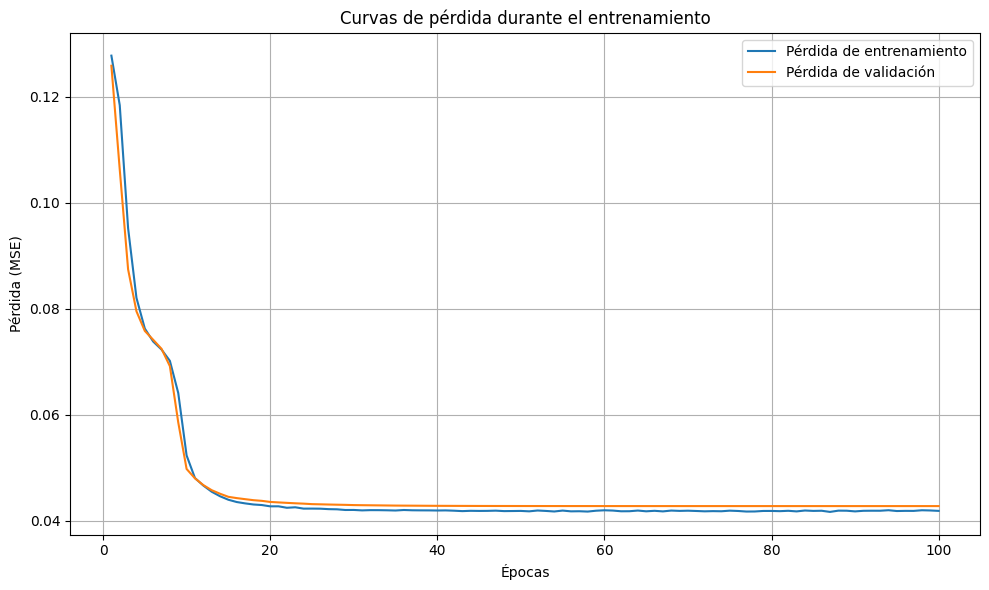

/var/tmp/ipykernel_447890/2328638315.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load("autoencoder_best.pth"))



Entrenamiento final sobre todos los datos (3 épocas)...


Fine-tuning Época 1/3: 100%|██████████| 50/50 [00:00<00:00, 117.75it/s]


Fine-tuning época [1/3], Pérdida: 0.041967


Fine-tuning Época 2/3: 100%|██████████| 50/50 [00:00<00:00, 117.60it/s]


Fine-tuning época [2/3], Pérdida: 0.041926


Fine-tuning Época 3/3: 100%|██████████| 50/50 [00:00<00:00, 116.14it/s]

Fine-tuning época [3/3], Pérdida: 0.041985

Modelo final guardado en autoencoder_final.pth


In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR

# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hiperparámetros
batch_size = 128
learning_rate = 0.0001
num_epochs = 100
patience = 10  # Early stopping

# DataLoaders (asegúrate de que X_train_encoder y X_val_encoder están definidos)
train_loader = torch.utils.data.DataLoader(X_train_encoder, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val_encoder, batch_size=batch_size, shuffle=False)

# Modelo Autoencoder (definido previamente)
autoencoder = Autoencoder().to(device)

# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Variables de control
best_val_loss = float('inf')
epochs_without_improvement = 0

# Scheduler: reduce a la mitad cada 5 épocas
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

# Para la gráfica
train_losses = []
val_losses = []

# Entrenamiento
print("Entrenando Autoencoder con validación y early stopping...")
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for img in tqdm(train_loader, desc=f"Época {epoch+1}/{num_epochs}"):
        images = img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validación
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for img in val_loader:
            images = img.to(device)
            outputs = autoencoder(images)
            loss = criterion(outputs, images)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheduler.step()

    print(f"Época [{epoch+1}/{num_epochs}], Pérdida entrenamiento: {train_loss:.6f}, Pérdida validación: {val_loss:.6f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Deteniendo entrenamiento por early stopping (sin mejora en {patience} épocas).")
            break

# Gráfica de pérdidas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Pérdida de entrenamiento')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Curvas de pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Guardar el modelo mejor
torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
# Cargar el modelo guardado
autoencoder.load_state_dict(torch.load("autoencoder_best.pth"))

# Crear nuevo DataLoader con TODO el conjunto de entrenamiento y validación
full_dataset = torch.utils.data.ConcatDataset([X_train_encoder, X_val_encoder])
full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Entrenamiento final con todo el conjunto (1-3 épocas recomendadas)
final_epochs = 3
print(f"\nEntrenamiento final sobre todos los datos ({final_epochs} épocas)...")
autoencoder.train()

for epoch in range(final_epochs):
    running_loss = 0.0
    for img in tqdm(full_loader, desc=f"Fine-tuning Época {epoch+1}/{final_epochs}"):
        images = img[0].to(device) if isinstance(img, (tuple, list)) else img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Fine-tuning época [{epoch+1}/{final_epochs}], Pérdida: {running_loss / len(full_loader):.6f}")

# Guardar modelo final ajustado
final_model_path = "autoencoder_final.pth"
torch.save(autoencoder.state_dict(), final_model_path)
print(f"\nModelo final guardado en {final_model_path}")



In [68]:
# ==========================
# Cargar modelo y evaluar solo el Encoder
# ==========================

model = Autoencoder()
model.load_state_dict(torch.load(final_model_path))
model.eval()  # Modo evaluación

# Extraer solo el encoder
encoder = autoencoder.encoder
encoder.to(device)
encoder.eval()


embeddings = []
labels = []
indices = []

for img,label,idx in tqdm(total_dataset):
    with torch.no_grad():
        emb = encoder(img.unsqueeze(0).to(device))
    emb = emb.squeeze().cpu().numpy()
    embeddings.append(emb)
    labels.append(label)
    indices.append(idx)

# Procesar todas las imágenes en el dataset externo
print("Extrayendo embeddings...")


import pandas as pd
import numpy as np

# Crear DataFrame con todo
df_embeddings = pd.DataFrame(embeddings)
df_embeddings["label"] = labels
df_embeddings["index"] = indices

# Ordenar por el índice original del DataFrame
df_embeddings_sorted = df_embeddings.sort_values("index").set_index("index")

# Opcional: asegurarse de que alinea con df
df_embeddings_sorted = df_embeddings_sorted.reindex(df.index)

df_embeddings_sorted=df_embeddings_sorted[1:]

# Guardar
df_embeddings_sorted.to_csv("dataset_embeddings_encoder.csv")

/var/tmp/ipykernel_447890/158012411.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(final_model_path))
  0%|          | 0/7854 [00:00<?,

100%|██████████| 7854/7854 [00:07<00:00, 1096.90it/s]


Extrayendo embeddings...


## RESNET AUTOENCODER 2

In [69]:
import torch
import torch.nn as nn
import torchvision.models as models


class ViewLayer(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape

    def forward(self, x):
        return x.view(x.size(0), *self.shape)

class ResNetAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        resnet = models.resnet50(pretrained=True)

        # Congelar los parámetros del encoder preentrenado
        for param in list(resnet.children())[:8]:
            for p in param.parameters():
                p.requires_grad = False

        # Compacto: todas las capas convolucionales hasta layer4
        self.encoder = nn.Sequential(*list(resnet.children())[:8],
                                     nn.MaxPool2d(kernel_size=4,stride=1),
                                     nn.Flatten(),
                                     nn.Linear(2048,1024),
                                     nn.ReLU(),
                                     nn.Dropout(0.2),
                                     nn.Linear(1024, 256),
                                     nn.ReLU(),
                                     nn.Dropout(0.2),
                                     nn.Linear(256, 128),
                                     nn.ReLU())


        # Decoder: invertir el proceso usando conv transpuestas
        self.decoder = nn.Sequential(
            # Primero, expandimos [B, 64] → [B, 256]
            nn.Linear(128, 256),
            nn.ReLU(),

            # Expandimos más: [B, 256] → [B, 2048]
            nn.Linear(256, 2048*4*4),
            nn.ReLU(),
            ViewLayer((2048, 4, 4)),  # Cambiar la forma a [B, 2048, 4, 4]
            # Ahora, aplicamos las capas


            nn.ConvTranspose2d(2048, 512, kernel_size=4, stride=2, padding=1),  # -> [B, 512, 8, 8]
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),    # -> [B, 256, 32, 32]
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),     # -> [B, 64, 64, 64]
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),      # -> [B, 64, 128, 128]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),       # -> [B, 3, 128, 128]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Prueba con un tensor de entrada (batch_size=1, canal=3, 28x28)
x_test = torch.randn(1, 3, 128, 128)

# Inicializar modelo y obtener salida
model = ResNetAutoencoder()
output = model(x_test)
print(model.state_dict)
output_encoder=model.encoder(x_test)

# Imprimir dimensiones de salida
print("Dimensión final de salida:", output.shape)  # Esperado: (1, 1, 28, 28)
print("Dimensión final de salida encoder:", output_encoder.shape)  # Esperado: (1, 1, 28, 28)

from torchinfo import summary
# Resumen del modelo
summary(model, input_size=(1, 3, 128, 128), device='cuda')


/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<bound method Module.state_dict of ResNetAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsa

Layer (type:depth-idx)                        Output Shape              Param #
ResNetAutoencoder                             [1, 3, 128, 128]          --
├─Sequential: 1-1                             [1, 128]                  --
│    └─Conv2d: 2-1                            [1, 64, 64, 64]           (9,408)
│    └─BatchNorm2d: 2-2                       [1, 64, 64, 64]           (128)
│    └─ReLU: 2-3                              [1, 64, 64, 64]           --
│    └─MaxPool2d: 2-4                         [1, 64, 32, 32]           --
│    └─Sequential: 2-5                        [1, 256, 32, 32]          --
│    │    └─Bottleneck: 3-1                   [1, 256, 32, 32]          (75,008)
│    │    └─Bottleneck: 3-2                   [1, 256, 32, 32]          (70,400)
│    │    └─Bottleneck: 3-3                   [1, 256, 32, 32]          (70,400)
│    └─Sequential: 2-6                        [1, 512, 16, 16]          --
│    │    └─Bottleneck: 3-4                   [1, 512, 16, 16]       

In [70]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),  # <--- convierte a RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


train_dataset = EmbeddingDataset2(X_train.tolist(), y_train.tolist(), df_train.index.to_numpy(),transform)
imgs = [train_dataset[i][0] for i in range(len(train_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_train_resnet = torch.stack(imgs)

# Cargar y transformar todas las imágenes normales
val_dataset   = EmbeddingDataset2(X_val.tolist(), y_val.tolist(), df_val.index.to_numpy(),transform)
imgs = [val_dataset[i][0] for i in range(len(val_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_val_resnet = torch.stack(imgs)

test_dataset  = EmbeddingDataset2(X_test.tolist(), y_test.tolist(), df_test.index.to_numpy(),transform)
imgs = [test_dataset[i][0] for i in range(len(test_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_test_resnet = torch.stack(imgs)

In [71]:
from torch.utils.data import ConcatDataset

total_dataset= ConcatDataset([train_dataset, val_dataset, test_dataset])

Entrenando Autoencoder con validación y early stopping...


Época 1/100: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]


Época [1/100], Pérdida entrenamiento: 1.920720, Pérdida validación: 1.671427


Época 2/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [2/100], Pérdida entrenamiento: 1.531825, Pérdida validación: 1.386046


Época 3/100: 100%|██████████| 40/40 [00:15<00:00,  2.61it/s]


Época [3/100], Pérdida entrenamiento: 1.080754, Pérdida validación: 0.992088


Época 4/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [4/100], Pérdida entrenamiento: 0.943724, Pérdida validación: 0.919853


Época 5/100: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]


Época [5/100], Pérdida entrenamiento: 0.915388, Pérdida validación: 0.913878


Época 6/100: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]


Época [6/100], Pérdida entrenamiento: 0.898514, Pérdida validación: 0.888252


Época 7/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [7/100], Pérdida entrenamiento: 0.892364, Pérdida validación: 0.981744


Época 8/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [8/100], Pérdida entrenamiento: 0.892297, Pérdida validación: 0.876563


Época 9/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [9/100], Pérdida entrenamiento: 0.884513, Pérdida validación: 0.871546


Época 10/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [10/100], Pérdida entrenamiento: 0.881115, Pérdida validación: 0.864214


Época 11/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [11/100], Pérdida entrenamiento: 0.848802, Pérdida validación: 0.848347


Época 12/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [12/100], Pérdida entrenamiento: 0.833236, Pérdida validación: 0.838797


Época 13/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [13/100], Pérdida entrenamiento: 0.835774, Pérdida validación: 0.826313


Época 14/100: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]


Época [14/100], Pérdida entrenamiento: 0.819001, Pérdida validación: 0.817445


Época 15/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [15/100], Pérdida entrenamiento: 0.809394, Pérdida validación: 0.836161


Época 16/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [16/100], Pérdida entrenamiento: 0.807621, Pérdida validación: 0.802750


Época 17/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [17/100], Pérdida entrenamiento: 0.797767, Pérdida validación: 0.803880


Época 18/100: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]


Época [18/100], Pérdida entrenamiento: 0.787970, Pérdida validación: 0.794919


Época 19/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [19/100], Pérdida entrenamiento: 0.777620, Pérdida validación: 0.819284


Época 20/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [20/100], Pérdida entrenamiento: 0.780937, Pérdida validación: 0.792258


Época 21/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [21/100], Pérdida entrenamiento: 0.771382, Pérdida validación: 0.781548


Época 22/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [22/100], Pérdida entrenamiento: 0.760941, Pérdida validación: 0.812475


Época 23/100: 100%|██████████| 40/40 [00:14<00:00,  2.68it/s]


Época [23/100], Pérdida entrenamiento: 0.752292, Pérdida validación: 0.765327


Época 24/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [24/100], Pérdida entrenamiento: 0.740640, Pérdida validación: 0.803843


Época 25/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [25/100], Pérdida entrenamiento: 0.749944, Pérdida validación: 0.748280


Época 26/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [26/100], Pérdida entrenamiento: 0.726090, Pérdida validación: 0.748227


Época 27/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [27/100], Pérdida entrenamiento: 0.713597, Pérdida validación: 0.740608


Época 28/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [28/100], Pérdida entrenamiento: 0.707556, Pérdida validación: 0.767397


Época 29/100: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]


Época [29/100], Pérdida entrenamiento: 0.700614, Pérdida validación: 0.733979


Época 30/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [30/100], Pérdida entrenamiento: 0.688915, Pérdida validación: 0.737231


Época 31/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [31/100], Pérdida entrenamiento: 0.686323, Pérdida validación: 0.737668


Época 32/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [32/100], Pérdida entrenamiento: 0.675425, Pérdida validación: 0.719164


Época 33/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [33/100], Pérdida entrenamiento: 0.676943, Pérdida validación: 0.720774


Época 34/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [34/100], Pérdida entrenamiento: 0.664493, Pérdida validación: 0.717053


Época 35/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [35/100], Pérdida entrenamiento: 0.654757, Pérdida validación: 0.738574


Época 36/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [36/100], Pérdida entrenamiento: 0.661004, Pérdida validación: 0.716334


Época 37/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [37/100], Pérdida entrenamiento: 0.652157, Pérdida validación: 0.724376


Época 38/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [38/100], Pérdida entrenamiento: 0.643973, Pérdida validación: 0.719573


Época 39/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [39/100], Pérdida entrenamiento: 0.639894, Pérdida validación: 0.713078


Época 40/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [40/100], Pérdida entrenamiento: 0.623465, Pérdida validación: 0.736089


Época 41/100: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]


Época [41/100], Pérdida entrenamiento: 0.624661, Pérdida validación: 0.720411


Época 42/100: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]


Época [42/100], Pérdida entrenamiento: 0.624922, Pérdida validación: 0.721365


Época 43/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [43/100], Pérdida entrenamiento: 0.615456, Pérdida validación: 0.708986


Época 44/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [44/100], Pérdida entrenamiento: 0.612359, Pérdida validación: 0.714091


Época 45/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [45/100], Pérdida entrenamiento: 0.603790, Pérdida validación: 0.724028


Época 46/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [46/100], Pérdida entrenamiento: 0.604451, Pérdida validación: 0.711082


Época 47/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [47/100], Pérdida entrenamiento: 0.593195, Pérdida validación: 0.715518


Época 48/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [48/100], Pérdida entrenamiento: 0.592084, Pérdida validación: 0.714094


Época 49/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [49/100], Pérdida entrenamiento: 0.591061, Pérdida validación: 0.698183


Época 50/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [50/100], Pérdida entrenamiento: 0.589739, Pérdida validación: 0.698803


Época 51/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [51/100], Pérdida entrenamiento: 0.575272, Pérdida validación: 0.703620


Época 52/100: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]


Época [52/100], Pérdida entrenamiento: 0.570928, Pérdida validación: 0.710174


Época 53/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [53/100], Pérdida entrenamiento: 0.567811, Pérdida validación: 0.701461


Época 54/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [54/100], Pérdida entrenamiento: 0.575166, Pérdida validación: 0.708625


Época 55/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [55/100], Pérdida entrenamiento: 0.563822, Pérdida validación: 0.709412


Época 56/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [56/100], Pérdida entrenamiento: 0.562976, Pérdida validación: 0.696585


Época 57/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [57/100], Pérdida entrenamiento: 0.556490, Pérdida validación: 0.711136


Época 58/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [58/100], Pérdida entrenamiento: 0.548880, Pérdida validación: 0.707352


Época 59/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [59/100], Pérdida entrenamiento: 0.553116, Pérdida validación: 0.714299


Época 60/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [60/100], Pérdida entrenamiento: 0.542764, Pérdida validación: 0.703235


Época 61/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [61/100], Pérdida entrenamiento: 0.543121, Pérdida validación: 0.713851


Época 62/100: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Época [62/100], Pérdida entrenamiento: 0.546918, Pérdida validación: 0.705857


Época 63/100: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]


Época [63/100], Pérdida entrenamiento: 0.534965, Pérdida validación: 0.697122


Época 64/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [64/100], Pérdida entrenamiento: 0.535292, Pérdida validación: 0.715043


Época 65/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [65/100], Pérdida entrenamiento: 0.532484, Pérdida validación: 0.697930


Época 66/100: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


Época [66/100], Pérdida entrenamiento: 0.535408, Pérdida validación: 0.730757
Deteniendo entrenamiento por early stopping (sin mejora en 10 épocas).


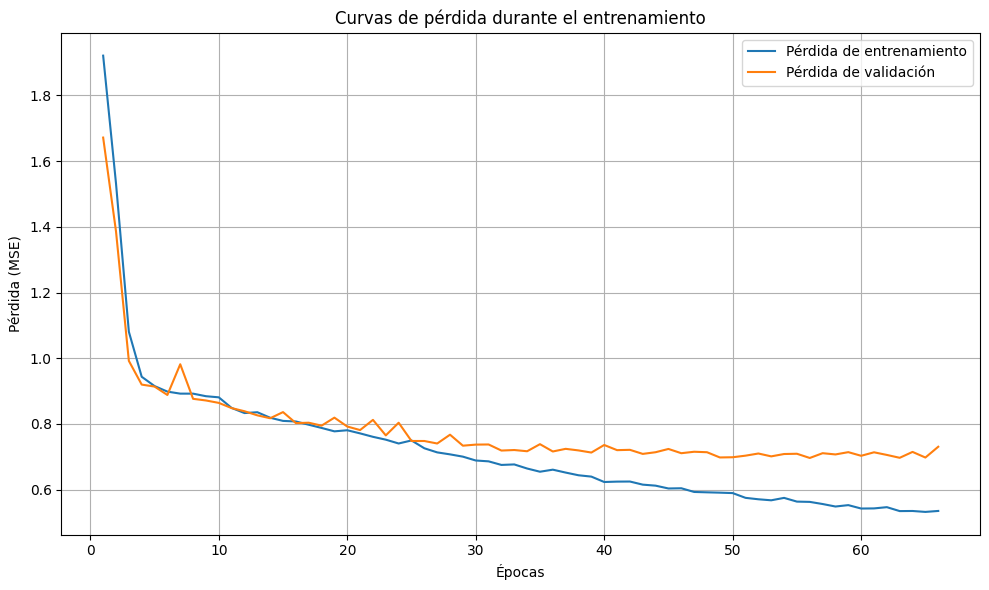

/var/tmp/ipykernel_447890/3887174518.py:95: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load("autoencoder_resnet_best.pth"))



Entrenamiento final sobre todos los datos (3 épocas)...


Fine-tuning Época 1/3: 100%|██████████| 50/50 [00:18<00:00,  2.71it/s]


Fine-tuning época [1/3], Pérdida: 0.581443


Fine-tuning Época 2/3: 100%|██████████| 50/50 [00:18<00:00,  2.70it/s]


Fine-tuning época [2/3], Pérdida: 0.578899


Fine-tuning Época 3/3: 100%|██████████| 50/50 [00:18<00:00,  2.70it/s]


Fine-tuning época [3/3], Pérdida: 0.567696

Modelo final guardado en autoencoder_resnet_codificacion_final.pth


In [72]:


# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Hiperparámetros
batch_size = 128
learning_rate = 0.0001
num_epochs = 100
patience = 10  # Early stopping

# DataLoaders (asegúrate de que X_train_encoder y X_val_encoder están definidos)
train_loader = torch.utils.data.DataLoader(X_train_resnet, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val_resnet, batch_size=batch_size, shuffle=False)

# Crear instancia del Autoencoder
autoencoder = ResNetAutoencoder().to(device)

# Definir función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Variables de control
best_val_loss = float('inf')
epochs_without_improvement = 0

# Para la gráfica
train_losses = []
val_losses = []
scheluder= StepLR(optimizer, step_size=5, gamma=0.5)

# Entrenamiento
print("Entrenando Autoencoder con validación y early stopping...")
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for img in tqdm(train_loader, desc=f"Época {epoch+1}/{num_epochs}"):
        images = img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validación
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for img in val_loader:
            images = img.to(device)
            outputs = autoencoder(images)
            loss = criterion(outputs, images)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheluder.step

    print(f"Época [{epoch+1}/{num_epochs}], Pérdida entrenamiento: {train_loss:.6f}, Pérdida validación: {val_loss:.6f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Deteniendo entrenamiento por early stopping (sin mejora en {patience} épocas).")
            break

# Gráfica de pérdidas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Pérdida de entrenamiento')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Curvas de pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Guardar el modelo mejor
torch.save(autoencoder.state_dict(), "autoencoder_resnet_best.pth")
# Cargar el modelo guardado
autoencoder.load_state_dict(torch.load("autoencoder_resnet_best.pth"))

# Crear nuevo DataLoader con TODO el conjunto de entrenamiento y validación
full_dataset = torch.utils.data.ConcatDataset([X_train_resnet, X_val_resnet])
full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Entrenamiento final con todo el conjunto (1-3 épocas recomendadas)
final_epochs = 3
print(f"\nEntrenamiento final sobre todos los datos ({final_epochs} épocas)...")
autoencoder.train()

for epoch in range(final_epochs):
    running_loss = 0.0
    for img in tqdm(full_loader, desc=f"Fine-tuning Época {epoch+1}/{final_epochs}"):
        images = img[0].to(device) if isinstance(img, (tuple, list)) else img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Fine-tuning época [{epoch+1}/{final_epochs}], Pérdida: {running_loss / len(full_loader):.6f}")

# Guardar modelo final ajustado
final_model_path = "autoencoder_resnet_codificacion_final.pth"
torch.save(autoencoder.state_dict(), final_model_path)
print(f"\nModelo final guardado en {final_model_path}")




In [73]:
# ==========================
# Cargar modelo y evaluar solo el Encoder
# ==========================

# Cargar el modelo entrenado
model = ResNetAutoencoder()
model.load_state_dict(torch.load("autoencoder_resnet_codificacion_final.pth"))
model.eval()  # Modo evaluación

# Extraer solo el encoder
encoder = model.encoder
encoder.to(device)
encoder.eval()



# Lista para almacenar los embeddings
embeddings = []
labels=[]
indices=[]
for img, label, idx in tqdm(total_dataset):
    with torch.no_grad():
        emb = encoder(img.unsqueeze(0).to(device))
    emb = emb.squeeze().cpu().numpy()
    embeddings.append(emb)
    labels.append(label)
    indices.append(idx)

# Procesar todas las imágenes en el dataset externo
print("Extrayendo embeddings...")


import pandas as pd
import numpy as np

# Crear DataFrame con todo
df_embeddings = pd.DataFrame(embeddings)
df_embeddings["label"] = labels
df_embeddings["index"] = indices

# Ordenar por el índice original del DataFrame
df_embeddings_sorted = df_embeddings.sort_values("index").set_index("index")

# Opcional: asegurarse de que alinea con df
df_embeddings_sorted = df_embeddings_sorted.reindex(df.index)

df_embeddings_sorted=df_embeddings_sorted[1:]

# Guardar
df_embeddings_sorted.to_csv("dataset_embeddings_encoder_resnet.csv")

/var/tmp/ipykernel_447890/123725328.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("autoencoder_resnet_codificacion_final.pth"))
100%|█

Extrayendo embeddings...


# IMAGENES REALES

In [2]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset


class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Recorrer directorios
        for class_name in sorted(os.listdir(root_dir)):
            class_path = os.path.join(root_dir, class_name)
            if os.path.isdir(class_path):
                label = class_name  # Obtener etiqueta de la carpeta
                for img_file in os.listdir(class_path):
                    self.image_paths.append(os.path.join(class_path, img_file))
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image,label

In [118]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# Entrenamiento (solo 'good')
dir='mvtec_anomaly_detection/carpet/train'
train_dataset = CustomImageDataset(dir,transform=transform) 
print(f"Total training images: {len(train_dataset)}")
print(train_dataset.image_paths[:5])  # Muestra las primeras 5 imágenes

# Prueba (con defectos y 'good')
test_dataset = CustomImageDataset('mvtec_anomaly_detection/carpet/test', transform=transform)

print(f"Total test images: {len(test_dataset)}")
print(test_dataset.image_paths[70:])  # Muestra las primeras 5 imágenes

Total training images: 280
['mvtec_anomaly_detection/carpet/train/good/216.png', 'mvtec_anomaly_detection/carpet/train/good/204.png', 'mvtec_anomaly_detection/carpet/train/good/091.png', 'mvtec_anomaly_detection/carpet/train/good/078.png', 'mvtec_anomaly_detection/carpet/train/good/147.png']
Total test images: 117
['mvtec_anomaly_detection/carpet/test/hole/009.png', 'mvtec_anomaly_detection/carpet/test/hole/006.png', 'mvtec_anomaly_detection/carpet/test/hole/013.png', 'mvtec_anomaly_detection/carpet/test/hole/016.png', 'mvtec_anomaly_detection/carpet/test/hole/012.png', 'mvtec_anomaly_detection/carpet/test/hole/002.png', 'mvtec_anomaly_detection/carpet/test/hole/000.png', 'mvtec_anomaly_detection/carpet/test/hole/005.png', 'mvtec_anomaly_detection/carpet/test/hole/001.png', 'mvtec_anomaly_detection/carpet/test/hole/008.png', 'mvtec_anomaly_detection/carpet/test/hole/015.png', 'mvtec_anomaly_detection/carpet/test/metal_contamination/011.png', 'mvtec_anomaly_detection/carpet/test/metal_c

In [119]:
import os
import csv
from torchvision.utils import save_image
from tqdm import tqdm

# Dataset a exportar
dataset = test_dataset  # o train_dataset

# Directorios de salida
output_dir = "export_test"
img_dir = os.path.join(output_dir, "imagenes")
csv_path = os.path.join(output_dir, "etiquetas.csv")

# Crear carpetas
os.makedirs(img_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Crear CSV
with open(csv_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filename', 'label'])

    for idx, (img, label) in enumerate(tqdm(dataset)):
        filename = f"test_img_{idx:05d}.png"
        save_path = os.path.join(img_dir, filename)
        save_path_2= os.path.join(f"imagenes_reales/{filename}")

        # Guardar imagen
        save_image(img, save_path)
        save_image(img,save_path_2)

        # Escribir en el CSV
        writer.writerow([filename, label])

print(f"\n✅ Imágenes exportadas en: {img_dir}")
print(f"✅ Etiquetas guardadas en: {csv_path}")


100%|██████████| 117/117 [00:05<00:00, 21.79it/s]


✅ Imágenes exportadas en: export_test/imagenes
✅ Etiquetas guardadas en: export_test/etiquetas.csv


In [120]:
import os
import csv
from torchvision.utils import save_image
from tqdm import tqdm

# Dataset a exportar
dataset = train_dataset  # o train_dataset

# Directorios de salida
output_dir = "export_train"
img_dir = os.path.join(output_dir, "imagenes")
csv_path = os.path.join(output_dir, "etiquetas.csv")

# Crear carpetas
os.makedirs(img_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Crear CSV
with open(csv_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filename', 'label'])

    for idx, (img, label) in enumerate(tqdm(dataset)):
        filename = f"train_img_{idx:05d}.png"
        save_path = os.path.join(img_dir, filename)
        save_path_2= os.path.join(f"imagenes_reales/{filename}")

        # Guardar imagen
        save_image(img, save_path)
        save_image(img, save_path_2)

        # Escribir en el CSV
        writer.writerow([filename, label])

print(f"\n✅ Imágenes exportadas en: {img_dir}")
print(f"✅ Etiquetas guardadas en: {csv_path}")


100%|██████████| 280/280 [00:12<00:00, 21.92it/s]


✅ Imágenes exportadas en: export_train/imagenes
✅ Etiquetas guardadas en: export_train/etiquetas.csv


In [121]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import random
# Cargar etiquetas de train y test
df_train = pd.read_csv("export_train/etiquetas.csv")
df_test = pd.read_csv("export_test/etiquetas.csv")

# Unir ambos datasets
df = pd.concat([df_train, df_test], ignore_index=True)

# Codificar etiquetas: 'good' → 0, otros → 1
df["label"] = df["label"].apply(lambda x: 0 if x == "good" else 1)
df.to_csv("imagenes_reales/dataset_labels.csv", index=False)
print("✅ Archivo combinado guardado en: imagenes_reales/dataset_labels.csv")

# -------------------------
# Análisis del dataset
# -------------------------
# Cargar el dataset fusionado
df = pd.read_csv("imagenes_reales/dataset_labels.csv")

# Cargar el dataset desde el archivo CSV
#dataset_path = "patched_dataset/dataset_labels.csv"
#df = pd.read_csv(dataset_path)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42,stratify=df["label"])

df_train.to_csv(os.path.join("entrenamiento", "entrenamiento_etiquetas.csv"), index=False)
df_test.to_csv(os.path.join("test", "test_etiquetas.csv"), index=False)

# Mostrar las primeras filas del dataset
print(df.head(52))
random.seed(42)  # Para reproducibilidad
print(df_train.head(10))
print(df_test.head(10))
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train = df_train["filename"]
y_train = df_train["label"]
X_test =  df_test["filename"]
y_test = df_test["label"]
# Mostrar las primeras filas del conjunto de entrenamiento
print("Conjunto de entrenamiento:")
print(X_train.head(10))
print("Conjunto de prueba:")
print(X_test.head(10))

print(f"Total de imagenes en el conjunto de entrenamiento: {len(X_train)}")
print(f"Total de imagenes en el conjunto de prueba: {len(X_test)}")



df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42,stratify=df_train["label"])

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train = df_train["filename"]
y_train = df_train["label"]
X_val =  df_val["filename"]
y_val = df_val["label"]
# Mostrar las primeras filas del conjunto de entrenamiento
print("Conjunto de entrenamiento:")
print(X_train.head(10))
print("Conjunto de validación:")
print(X_val.head(10))

print(f"Total de imagenes en el conjunto de entrenamiento: {len(X_train)}")
print(f"Total de imagenes en el conjunto de validación: {len(X_val)}")


# Cálculos
normal_count = df[df["label"] == 0].shape[0]
anomalous_count = df[df["label"] == 1].shape[0]
total_count = len(df)

normal_percentage = (normal_count / total_count) * 100
anomalous_percentage = (anomalous_count / total_count) * 100

# Obtener nombres de imágenes anómalas
anomalous_filenames = df[df["label"] == 1]["filename"].tolist()

# Mostrar resultados
print(f"\nTotal de imágenes: {total_count}")
print(f"Imágenes normales (label=0): {normal_count} ({normal_percentage:.2f}%)")
print(f"Imágenes anómalas (label=1): {anomalous_count} ({anomalous_percentage:.2f}%)")
print("\nImágenes anómalas:")
print(anomalous_filenames)

print(df_train[df_train["label"] == 0].shape[0]/len(df_train))
print(df_train[df_train["label"] == 1].shape[0]/len(df_train))

print(df_val[df_val["label"] == 0].shape[0]/len(df_val))
print(df_val[df_val["label"] == 1].shape[0]/len(df_val))

print(df_test[df_test["label"] == 0].shape[0]/len(df_test))
print(df_test[df_test["label"] == 1].shape[0]/len(df_test))


✅ Archivo combinado guardado en: imagenes_reales/dataset_labels.csv
               filename  label
0   train_img_00000.png      0
1   train_img_00001.png      0
2   train_img_00002.png      0
3   train_img_00003.png      0
4   train_img_00004.png      0
5   train_img_00005.png      0
6   train_img_00006.png      0
7   train_img_00007.png      0
8   train_img_00008.png      0
9   train_img_00009.png      0
10  train_img_00010.png      0
11  train_img_00011.png      0
12  train_img_00012.png      0
13  train_img_00013.png      0
14  train_img_00014.png      0
15  train_img_00015.png      0
16  train_img_00016.png      0
17  train_img_00017.png      0
18  train_img_00018.png      0
19  train_img_00019.png      0
20  train_img_00020.png      0
21  train_img_00021.png      0
22  train_img_00022.png      0
23  train_img_00023.png      0
24  train_img_00024.png      0
25  train_img_00025.png      0
26  train_img_00026.png      0
27  train_img_00027.png      0
28  train_img_00028.png      0
29

## FLATTEN 3

In [92]:
def flatten_image(image_path):
    if os.path.exists(image_path):
        img = Image.open(image_path)
        img_array = np.array(img)
        flattened_image = img_array.flatten()
        return flattened_image
    else:
        print(f"El archivo {image_path} no se encuentra.")
        return None

In [93]:
import torch
import numpy as np 

flattened_images = []
labels = []

for _, row in df.iterrows():
    image_path = row['filename']
    flattened_image = flatten_image(f"imagenes_reales/{image_path}")  # debe devolver un tensor
    flattened_tensor = torch.from_numpy(flattened_image)
    flattened_images.append(flattened_tensor)
    labels.append(row['label'])

# Convertimos la lista de tensores a un solo tensor
image_tensor = torch.stack(flattened_images)  # shape: [N, ...]


print(image_tensor.shape)  # Verificar la forma del tensor de imágenes

label_tensor = torch.tensor(labels)

print(image_tensor.shape)  # Verificar la forma del tensor

# Guardar como CSV
df_embeddings = pd.DataFrame(image_tensor.numpy())
df_embeddings['label'] = label_tensor.numpy()  # Añadir columna de etiquetas al final

df_embeddings.to_csv("tus_embeddings.csv", index=False)
print(" Embeddings guardados en 'tus_embeddings.csv'")

torch.Size([347, 3072])
torch.Size([347, 3072])
 Embeddings guardados en 'tus_embeddings.csv'


## Modelo preentrenado 3

In [94]:
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image


# Cargar modelo preentrenado ResNet-50
model = models.resnet50(pretrained=True)

# Eliminar la capa de clasificación (fc)
model = torch.nn.Sequential(*list(model.children())[:-1])

# Ver la arquitectura resultante
print(model)

model.eval()  # Poner en modo evaluación

# Transformaciones necesarias para ResNet-50
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar a 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # se usan estos valores por que son los que se usaron
                                                                                 # el entrenamiento de la resnet
])

# Lista para almacenar los embeddings
embeddings = []

# Iterar sobre las imágenes del dataset
for index, row in df.iterrows():
    image_path = row['filename']
    image = Image.open(f"imagenes_reales/{image_path}")
    image = transform(image)
    image = image.unsqueeze(0)   #añadir una dimension mas para el batch

    with torch.no_grad():      #deshabilita el calculo del gradiente
        embedding = model(image)
    embedding = embedding.squeeze().cpu().numpy()   #squeeze: elimina dimensiones de tamaño 1 del tensor
                                                    #cpu: mueve el tensor embedding a la gpu
                                                    #numpy: convierte a un array de numpy
    embeddings.append(embedding)

#Crear un DataFrame con los embeddings
embeddings_df = pd.DataFrame(embeddings)
embeddings_df['label'] = df['label']  # Agregar las etiquetas al nuevo dataset

# Guardar el DataFrame con los embeddings
embeddings_df.to_csv("embeddings.csv", index=False)



/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


## Autoencoder 3

In [95]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_channels=3, latent_channels=128):
        super(Autoencoder, self).__init__()

        # Encoder: 32x32 → 1x1 con 128 canales
        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1),  # 32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 16x16

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 16x16
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 8x8

            nn.Conv2d(64, 96, kernel_size=3, padding=1),  # 8x8
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 4x4

            nn.Conv2d(96, latent_channels, kernel_size=4),  # 4x4 → 1x1
            nn.ReLU()
        )

        # Decoder: 1x1 → 32x32 con 3 canales
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_channels, 96, kernel_size=4),  # 1x1 → 4x4
            nn.ReLU(),

            nn.ConvTranspose2d(96, 64, kernel_size=2, stride=2),  # 4x4 → 8x8
            nn.ReLU(),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),  # 8x8 → 16x16
            nn.ReLU(),

            nn.ConvTranspose2d(32, input_channels, kernel_size=2, stride=2),  # 16x16 → 32x32
            nn.Sigmoid()  # Para que la salida esté en [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)   # [B, 128, 1, 1]
        decoded = self.decoder(encoded)
        return decoded
    

# Prueba
x_test = torch.randn(1, 3, 32, 32)
model = Autoencoder()
output = model(x_test)
print("Dimensión final de salida:", output.shape)  # (1, 1, 32, 32)


Dimensión final de salida: torch.Size([1, 3, 32, 32])


In [96]:
# Transformaciones
transform = transforms.Compose([
    transforms.ToTensor()
])


train_dataset = EmbeddingDataset3(X_train.tolist(), y_train.tolist(), df_train.index.to_numpy(),transform)
imgs = [train_dataset[i][0] for i in range(len(train_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_train_encoder = torch.stack(imgs)

# Cargar y transformar todas las imágenes normales
val_dataset   = EmbeddingDataset3(X_val.tolist(), y_val.tolist(), df_val.index.to_numpy(),transform)
imgs = [val_dataset[i][0] for i in range(len(val_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_val_encoder = torch.stack(imgs)

test_dataset  = EmbeddingDataset3(X_test.tolist(), y_test.tolist(), df_test.index.to_numpy(),transform)
imgs = [test_dataset[i][0] for i in range(len(test_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_test_encoder = torch.stack(imgs)

In [97]:
from torch.utils.data import ConcatDataset


total_dataset= ConcatDataset([train_dataset, val_dataset, test_dataset])

print(total_dataset[0])

(tensor([[[0.4863, 0.5608, 0.5490,  ..., 0.5176, 0.6471, 0.6157],
         [0.4784, 0.5098, 0.5020,  ..., 0.4510, 0.5412, 0.5529],
         [0.3804, 0.5020, 0.4902,  ..., 0.4824, 0.5647, 0.5647],
         ...,
         [0.4431, 0.4000, 0.3569,  ..., 0.4314, 0.3451, 0.4745],
         [0.4471, 0.5020, 0.5137,  ..., 0.4353, 0.3922, 0.4980],
         [0.4588, 0.4667, 0.4784,  ..., 0.3686, 0.4510, 0.4078]],

        [[0.5098, 0.5922, 0.5765,  ..., 0.5294, 0.6745, 0.6314],
         [0.5020, 0.5333, 0.5294,  ..., 0.4627, 0.5569, 0.5647],
         [0.3922, 0.5294, 0.5176,  ..., 0.4941, 0.5843, 0.5765],
         ...,
         [0.4627, 0.4157, 0.3686,  ..., 0.4549, 0.3529, 0.4863],
         [0.4667, 0.5255, 0.5373,  ..., 0.4510, 0.4000, 0.5098],
         [0.4745, 0.4784, 0.4980,  ..., 0.3765, 0.4627, 0.4157]],

        [[0.4667, 0.5529, 0.5412,  ..., 0.5216, 0.6627, 0.6196],
         [0.4627, 0.4980, 0.4941,  ..., 0.4510, 0.5451, 0.5529],
         [0.3647, 0.4941, 0.4863,  ..., 0.4824, 0.5765, 0

Entrenando Autoencoder con validación y early stopping...


Época 1/100: 100%|██████████| 2/2 [00:00<00:00, 74.97it/s]

Época [1/100], Pérdida entrenamiento: 0.007858, Pérdida validación: 0.007532



Época 2/100: 100%|██████████| 2/2 [00:00<00:00, 74.87it/s]


Época [2/100], Pérdida entrenamiento: 0.007812, Pérdida validación: 0.007518


Época 3/100: 100%|██████████| 2/2 [00:00<00:00, 75.91it/s]


Época [3/100], Pérdida entrenamiento: 0.007816, Pérdida validación: 0.007504


Época 4/100: 100%|██████████| 2/2 [00:00<00:00, 76.78it/s]

Época [4/100], Pérdida entrenamiento: 0.007808, Pérdida validación: 0.007489



Época 5/100: 100%|██████████| 2/2 [00:00<00:00, 76.95it/s]


Época [5/100], Pérdida entrenamiento: 0.007800, Pérdida validación: 0.007475


Época 6/100: 100%|██████████| 2/2 [00:00<00:00, 77.03it/s]


Época [6/100], Pérdida entrenamiento: 0.007777, Pérdida validación: 0.007468


Época 7/100: 100%|██████████| 2/2 [00:00<00:00, 76.81it/s]


Época [7/100], Pérdida entrenamiento: 0.007762, Pérdida validación: 0.007461


Época 8/100: 100%|██████████| 2/2 [00:00<00:00, 110.56it/s]


Época [8/100], Pérdida entrenamiento: 0.007744, Pérdida validación: 0.007454


Época 9/100: 100%|██████████| 2/2 [00:00<00:00, 109.93it/s]


Época [9/100], Pérdida entrenamiento: 0.007847, Pérdida validación: 0.007447


Época 10/100: 100%|██████████| 2/2 [00:00<00:00, 110.53it/s]


Época [10/100], Pérdida entrenamiento: 0.007718, Pérdida validación: 0.007439


Época 11/100: 100%|██████████| 2/2 [00:00<00:00, 111.51it/s]


Época [11/100], Pérdida entrenamiento: 0.007740, Pérdida validación: 0.007436


Época 12/100: 100%|██████████| 2/2 [00:00<00:00, 112.65it/s]


Época [12/100], Pérdida entrenamiento: 0.007768, Pérdida validación: 0.007432


Época 13/100: 100%|██████████| 2/2 [00:00<00:00, 112.06it/s]


Época [13/100], Pérdida entrenamiento: 0.007727, Pérdida validación: 0.007428


Época 14/100: 100%|██████████| 2/2 [00:00<00:00, 112.37it/s]


Época [14/100], Pérdida entrenamiento: 0.007732, Pérdida validación: 0.007424


Época 15/100: 100%|██████████| 2/2 [00:00<00:00, 129.96it/s]


Época [15/100], Pérdida entrenamiento: 0.007720, Pérdida validación: 0.007420


Época 16/100: 100%|██████████| 2/2 [00:00<00:00, 132.91it/s]


Época [16/100], Pérdida entrenamiento: 0.007751, Pérdida validación: 0.007418


Época 17/100: 100%|██████████| 2/2 [00:00<00:00, 134.98it/s]


Época [17/100], Pérdida entrenamiento: 0.007727, Pérdida validación: 0.007416


Época 18/100: 100%|██████████| 2/2 [00:00<00:00, 134.29it/s]


Época [18/100], Pérdida entrenamiento: 0.007737, Pérdida validación: 0.007414


Época 19/100: 100%|██████████| 2/2 [00:00<00:00, 135.70it/s]


Época [19/100], Pérdida entrenamiento: 0.007744, Pérdida validación: 0.007412


Época 20/100: 100%|██████████| 2/2 [00:00<00:00, 132.72it/s]


Época [20/100], Pérdida entrenamiento: 0.007723, Pérdida validación: 0.007410


Época 21/100: 100%|██████████| 2/2 [00:00<00:00, 134.99it/s]


Época [21/100], Pérdida entrenamiento: 0.007672, Pérdida validación: 0.007409


Época 22/100: 100%|██████████| 2/2 [00:00<00:00, 136.12it/s]


Época [22/100], Pérdida entrenamiento: 0.007725, Pérdida validación: 0.007408


Época 23/100: 100%|██████████| 2/2 [00:00<00:00, 136.05it/s]


Época [23/100], Pérdida entrenamiento: 0.007711, Pérdida validación: 0.007407


Época 24/100: 100%|██████████| 2/2 [00:00<00:00, 136.46it/s]


Época [24/100], Pérdida entrenamiento: 0.007740, Pérdida validación: 0.007406


Época 25/100: 100%|██████████| 2/2 [00:00<00:00, 133.64it/s]


Época [25/100], Pérdida entrenamiento: 0.007691, Pérdida validación: 0.007405


Época 26/100: 100%|██████████| 2/2 [00:00<00:00, 128.56it/s]


Época [26/100], Pérdida entrenamiento: 0.007712, Pérdida validación: 0.007404


Época 27/100: 100%|██████████| 2/2 [00:00<00:00, 132.12it/s]


Época [27/100], Pérdida entrenamiento: 0.007683, Pérdida validación: 0.007404


Época 28/100: 100%|██████████| 2/2 [00:00<00:00, 135.93it/s]


Época [28/100], Pérdida entrenamiento: 0.007700, Pérdida validación: 0.007403


Época 29/100: 100%|██████████| 2/2 [00:00<00:00, 135.18it/s]


Época [29/100], Pérdida entrenamiento: 0.007704, Pérdida validación: 0.007403


Época 30/100: 100%|██████████| 2/2 [00:00<00:00, 135.80it/s]


Época [30/100], Pérdida entrenamiento: 0.007757, Pérdida validación: 0.007402


Época 31/100: 100%|██████████| 2/2 [00:00<00:00, 135.42it/s]


Época [31/100], Pérdida entrenamiento: 0.007707, Pérdida validación: 0.007402


Época 32/100: 100%|██████████| 2/2 [00:00<00:00, 137.28it/s]


Época [32/100], Pérdida entrenamiento: 0.007756, Pérdida validación: 0.007401


Época 33/100: 100%|██████████| 2/2 [00:00<00:00, 137.89it/s]


Época [33/100], Pérdida entrenamiento: 0.007703, Pérdida validación: 0.007401


Época 34/100: 100%|██████████| 2/2 [00:00<00:00, 135.63it/s]


Época [34/100], Pérdida entrenamiento: 0.007695, Pérdida validación: 0.007401


Época 35/100: 100%|██████████| 2/2 [00:00<00:00, 134.60it/s]


Época [35/100], Pérdida entrenamiento: 0.007685, Pérdida validación: 0.007401


Época 36/100: 100%|██████████| 2/2 [00:00<00:00, 134.56it/s]


Época [36/100], Pérdida entrenamiento: 0.007708, Pérdida validación: 0.007400


Época 37/100: 100%|██████████| 2/2 [00:00<00:00, 135.49it/s]


Época [37/100], Pérdida entrenamiento: 0.007703, Pérdida validación: 0.007400


Época 38/100: 100%|██████████| 2/2 [00:00<00:00, 136.14it/s]


Época [38/100], Pérdida entrenamiento: 0.007688, Pérdida validación: 0.007400


Época 39/100: 100%|██████████| 2/2 [00:00<00:00, 134.33it/s]


Época [39/100], Pérdida entrenamiento: 0.007731, Pérdida validación: 0.007400


Época 40/100: 100%|██████████| 2/2 [00:00<00:00, 133.04it/s]


Época [40/100], Pérdida entrenamiento: 0.007712, Pérdida validación: 0.007400


Época 41/100: 100%|██████████| 2/2 [00:00<00:00, 134.54it/s]


Época [41/100], Pérdida entrenamiento: 0.007690, Pérdida validación: 0.007400


Época 42/100: 100%|██████████| 2/2 [00:00<00:00, 135.29it/s]


Época [42/100], Pérdida entrenamiento: 0.007707, Pérdida validación: 0.007400


Época 43/100: 100%|██████████| 2/2 [00:00<00:00, 135.15it/s]


Época [43/100], Pérdida entrenamiento: 0.007721, Pérdida validación: 0.007400


Época 44/100: 100%|██████████| 2/2 [00:00<00:00, 135.13it/s]


Época [44/100], Pérdida entrenamiento: 0.007734, Pérdida validación: 0.007400


Época 45/100: 100%|██████████| 2/2 [00:00<00:00, 134.48it/s]


Época [45/100], Pérdida entrenamiento: 0.007698, Pérdida validación: 0.007400


Época 46/100: 100%|██████████| 2/2 [00:00<00:00, 135.51it/s]


Época [46/100], Pérdida entrenamiento: 0.007727, Pérdida validación: 0.007400


Época 47/100: 100%|██████████| 2/2 [00:00<00:00, 135.96it/s]


Época [47/100], Pérdida entrenamiento: 0.007723, Pérdida validación: 0.007400


Época 48/100: 100%|██████████| 2/2 [00:00<00:00, 135.96it/s]


Época [48/100], Pérdida entrenamiento: 0.007699, Pérdida validación: 0.007399


Época 49/100: 100%|██████████| 2/2 [00:00<00:00, 135.11it/s]


Época [49/100], Pérdida entrenamiento: 0.007687, Pérdida validación: 0.007399


Época 50/100: 100%|██████████| 2/2 [00:00<00:00, 133.72it/s]


Época [50/100], Pérdida entrenamiento: 0.007765, Pérdida validación: 0.007399


Época 51/100: 100%|██████████| 2/2 [00:00<00:00, 136.13it/s]


Época [51/100], Pérdida entrenamiento: 0.007689, Pérdida validación: 0.007399


Época 52/100: 100%|██████████| 2/2 [00:00<00:00, 137.01it/s]


Época [52/100], Pérdida entrenamiento: 0.007702, Pérdida validación: 0.007399


Época 53/100: 100%|██████████| 2/2 [00:00<00:00, 135.36it/s]


Época [53/100], Pérdida entrenamiento: 0.007712, Pérdida validación: 0.007399


Época 54/100: 100%|██████████| 2/2 [00:00<00:00, 134.17it/s]


Época [54/100], Pérdida entrenamiento: 0.007668, Pérdida validación: 0.007399


Época 55/100: 100%|██████████| 2/2 [00:00<00:00, 129.24it/s]


Época [55/100], Pérdida entrenamiento: 0.007699, Pérdida validación: 0.007399


Época 56/100: 100%|██████████| 2/2 [00:00<00:00, 133.83it/s]


Época [56/100], Pérdida entrenamiento: 0.007711, Pérdida validación: 0.007399


Época 57/100: 100%|██████████| 2/2 [00:00<00:00, 136.23it/s]


Época [57/100], Pérdida entrenamiento: 0.007723, Pérdida validación: 0.007399


Época 58/100: 100%|██████████| 2/2 [00:00<00:00, 136.83it/s]


Época [58/100], Pérdida entrenamiento: 0.007755, Pérdida validación: 0.007399


Época 59/100: 100%|██████████| 2/2 [00:00<00:00, 136.31it/s]


Época [59/100], Pérdida entrenamiento: 0.007733, Pérdida validación: 0.007399


Época 60/100: 100%|██████████| 2/2 [00:00<00:00, 133.64it/s]


Época [60/100], Pérdida entrenamiento: 0.007677, Pérdida validación: 0.007399


Época 61/100: 100%|██████████| 2/2 [00:00<00:00, 135.55it/s]


Época [61/100], Pérdida entrenamiento: 0.007740, Pérdida validación: 0.007399


Época 62/100: 100%|██████████| 2/2 [00:00<00:00, 136.53it/s]


Época [62/100], Pérdida entrenamiento: 0.007692, Pérdida validación: 0.007399


Época 63/100: 100%|██████████| 2/2 [00:00<00:00, 137.93it/s]


Época [63/100], Pérdida entrenamiento: 0.007674, Pérdida validación: 0.007399


Época 64/100: 100%|██████████| 2/2 [00:00<00:00, 135.60it/s]


Época [64/100], Pérdida entrenamiento: 0.007721, Pérdida validación: 0.007399


Época 65/100: 100%|██████████| 2/2 [00:00<00:00, 134.15it/s]


Época [65/100], Pérdida entrenamiento: 0.007702, Pérdida validación: 0.007399


Época 66/100: 100%|██████████| 2/2 [00:00<00:00, 135.22it/s]


Época [66/100], Pérdida entrenamiento: 0.007724, Pérdida validación: 0.007399


Época 67/100: 100%|██████████| 2/2 [00:00<00:00, 136.42it/s]


Época [67/100], Pérdida entrenamiento: 0.007721, Pérdida validación: 0.007399


Época 68/100: 100%|██████████| 2/2 [00:00<00:00, 138.85it/s]


Época [68/100], Pérdida entrenamiento: 0.007712, Pérdida validación: 0.007399


Época 69/100: 100%|██████████| 2/2 [00:00<00:00, 136.09it/s]


Época [69/100], Pérdida entrenamiento: 0.007699, Pérdida validación: 0.007399


Época 70/100: 100%|██████████| 2/2 [00:00<00:00, 132.73it/s]


Época [70/100], Pérdida entrenamiento: 0.007731, Pérdida validación: 0.007399


Época 71/100: 100%|██████████| 2/2 [00:00<00:00, 134.88it/s]


Época [71/100], Pérdida entrenamiento: 0.007712, Pérdida validación: 0.007399


Época 72/100: 100%|██████████| 2/2 [00:00<00:00, 134.54it/s]


Época [72/100], Pérdida entrenamiento: 0.007705, Pérdida validación: 0.007399


Época 73/100: 100%|██████████| 2/2 [00:00<00:00, 132.69it/s]


Época [73/100], Pérdida entrenamiento: 0.007698, Pérdida validación: 0.007399


Época 74/100: 100%|██████████| 2/2 [00:00<00:00, 135.54it/s]


Época [74/100], Pérdida entrenamiento: 0.007711, Pérdida validación: 0.007399


Época 75/100: 100%|██████████| 2/2 [00:00<00:00, 136.06it/s]


Época [75/100], Pérdida entrenamiento: 0.007705, Pérdida validación: 0.007399


Época 76/100: 100%|██████████| 2/2 [00:00<00:00, 134.11it/s]


Época [76/100], Pérdida entrenamiento: 0.007771, Pérdida validación: 0.007399


Época 77/100: 100%|██████████| 2/2 [00:00<00:00, 134.65it/s]


Época [77/100], Pérdida entrenamiento: 0.007743, Pérdida validación: 0.007399


Época 78/100: 100%|██████████| 2/2 [00:00<00:00, 132.87it/s]


Época [78/100], Pérdida entrenamiento: 0.007693, Pérdida validación: 0.007399


Época 79/100: 100%|██████████| 2/2 [00:00<00:00, 133.12it/s]


Época [79/100], Pérdida entrenamiento: 0.007706, Pérdida validación: 0.007399


Época 80/100: 100%|██████████| 2/2 [00:00<00:00, 135.67it/s]


Época [80/100], Pérdida entrenamiento: 0.007737, Pérdida validación: 0.007399


Época 81/100: 100%|██████████| 2/2 [00:00<00:00, 134.91it/s]


Época [81/100], Pérdida entrenamiento: 0.007704, Pérdida validación: 0.007399


Época 82/100: 100%|██████████| 2/2 [00:00<00:00, 136.43it/s]


Época [82/100], Pérdida entrenamiento: 0.007673, Pérdida validación: 0.007399


Época 83/100: 100%|██████████| 2/2 [00:00<00:00, 135.36it/s]


Época [83/100], Pérdida entrenamiento: 0.007720, Pérdida validación: 0.007399


Época 84/100: 100%|██████████| 2/2 [00:00<00:00, 136.28it/s]


Época [84/100], Pérdida entrenamiento: 0.007639, Pérdida validación: 0.007399


Época 85/100: 100%|██████████| 2/2 [00:00<00:00, 133.74it/s]


Época [85/100], Pérdida entrenamiento: 0.007709, Pérdida validación: 0.007399


Época 86/100: 100%|██████████| 2/2 [00:00<00:00, 129.04it/s]


Época [86/100], Pérdida entrenamiento: 0.007665, Pérdida validación: 0.007399


Época 87/100: 100%|██████████| 2/2 [00:00<00:00, 130.71it/s]


Época [87/100], Pérdida entrenamiento: 0.007716, Pérdida validación: 0.007399


Época 88/100: 100%|██████████| 2/2 [00:00<00:00, 132.29it/s]


Época [88/100], Pérdida entrenamiento: 0.007709, Pérdida validación: 0.007399


Época 89/100: 100%|██████████| 2/2 [00:00<00:00, 136.42it/s]


Época [89/100], Pérdida entrenamiento: 0.007747, Pérdida validación: 0.007399


Época 90/100: 100%|██████████| 2/2 [00:00<00:00, 138.23it/s]


Época [90/100], Pérdida entrenamiento: 0.007701, Pérdida validación: 0.007399


Época 91/100: 100%|██████████| 2/2 [00:00<00:00, 135.92it/s]


Época [91/100], Pérdida entrenamiento: 0.007729, Pérdida validación: 0.007399


Época 92/100: 100%|██████████| 2/2 [00:00<00:00, 134.47it/s]


Época [92/100], Pérdida entrenamiento: 0.007735, Pérdida validación: 0.007399


Época 93/100: 100%|██████████| 2/2 [00:00<00:00, 133.02it/s]


Época [93/100], Pérdida entrenamiento: 0.007690, Pérdida validación: 0.007399


Época 94/100: 100%|██████████| 2/2 [00:00<00:00, 133.11it/s]


Época [94/100], Pérdida entrenamiento: 0.007702, Pérdida validación: 0.007399


Época 95/100: 100%|██████████| 2/2 [00:00<00:00, 132.16it/s]


Época [95/100], Pérdida entrenamiento: 0.007706, Pérdida validación: 0.007399


Época 96/100: 100%|██████████| 2/2 [00:00<00:00, 132.31it/s]


Época [96/100], Pérdida entrenamiento: 0.007723, Pérdida validación: 0.007399


Época 97/100: 100%|██████████| 2/2 [00:00<00:00, 134.31it/s]


Época [97/100], Pérdida entrenamiento: 0.007676, Pérdida validación: 0.007399
Deteniendo entrenamiento por early stopping (sin mejora en 10 épocas).


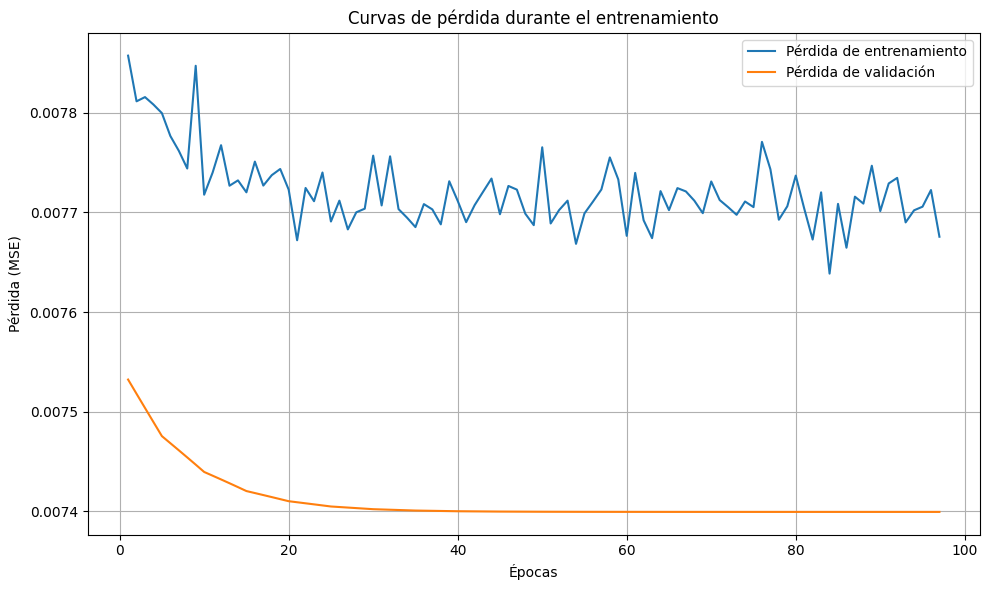

/var/tmp/ipykernel_11042/2328638315.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load("autoencoder_best.pth"))



Entrenamiento final sobre todos los datos (3 épocas)...


Fine-tuning Época 1/3: 100%|██████████| 3/3 [00:00<00:00, 149.78it/s]


Fine-tuning época [1/3], Pérdida: 0.007545


Fine-tuning Época 2/3: 100%|██████████| 3/3 [00:00<00:00, 146.87it/s]


Fine-tuning época [2/3], Pérdida: 0.007506


Fine-tuning Época 3/3: 100%|██████████| 3/3 [00:00<00:00, 143.89it/s]

Fine-tuning época [3/3], Pérdida: 0.007356

Modelo final guardado en autoencoder_final.pth


In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR

# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hiperparámetros
batch_size = 128
learning_rate = 0.0001
num_epochs = 100
patience = 10  # Early stopping

# DataLoaders (asegúrate de que X_train_encoder y X_val_encoder están definidos)
train_loader = torch.utils.data.DataLoader(X_train_encoder, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val_encoder, batch_size=batch_size, shuffle=False)

# Modelo Autoencoder (definido previamente)
autoencoder = Autoencoder().to(device)

# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Variables de control
best_val_loss = float('inf')
epochs_without_improvement = 0

# Scheduler: reduce a la mitad cada 5 épocas
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

# Para la gráfica
train_losses = []
val_losses = []

# Entrenamiento
print("Entrenando Autoencoder con validación y early stopping...")
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for img in tqdm(train_loader, desc=f"Época {epoch+1}/{num_epochs}"):
        images = img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validación
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for img in val_loader:
            images = img.to(device)
            outputs = autoencoder(images)
            loss = criterion(outputs, images)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheduler.step()

    print(f"Época [{epoch+1}/{num_epochs}], Pérdida entrenamiento: {train_loss:.6f}, Pérdida validación: {val_loss:.6f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Deteniendo entrenamiento por early stopping (sin mejora en {patience} épocas).")
            break

# Gráfica de pérdidas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Pérdida de entrenamiento')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Curvas de pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Guardar el modelo mejor
torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
# Cargar el modelo guardado
autoencoder.load_state_dict(torch.load("autoencoder_best.pth"))

# Crear nuevo DataLoader con TODO el conjunto de entrenamiento y validación
full_dataset = torch.utils.data.ConcatDataset([X_train_encoder, X_val_encoder])
full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Entrenamiento final con todo el conjunto (1-3 épocas recomendadas)
final_epochs = 3
print(f"\nEntrenamiento final sobre todos los datos ({final_epochs} épocas)...")
autoencoder.train()

for epoch in range(final_epochs):
    running_loss = 0.0
    for img in tqdm(full_loader, desc=f"Fine-tuning Época {epoch+1}/{final_epochs}"):
        images = img[0].to(device) if isinstance(img, (tuple, list)) else img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Fine-tuning época [{epoch+1}/{final_epochs}], Pérdida: {running_loss / len(full_loader):.6f}")

# Guardar modelo final ajustado
final_model_path = "autoencoder_final.pth"
torch.save(autoencoder.state_dict(), final_model_path)
print(f"\nModelo final guardado en {final_model_path}")



In [99]:
# ==========================
# Cargar modelo y evaluar solo el Encoder
# ==========================

model = Autoencoder()
model.load_state_dict(torch.load(final_model_path))
model.eval()  # Modo evaluación

# Extraer solo el encoder
encoder = autoencoder.encoder
encoder.to(device)
encoder.eval()


embeddings = []
labels = []
indices = []

for img,label,idx in tqdm(total_dataset):
    with torch.no_grad():
        emb = encoder(img.unsqueeze(0).to(device))
    emb = emb.squeeze().cpu().numpy()
    embeddings.append(emb)
    labels.append(label)
    indices.append(idx)

# Procesar todas las imágenes en el dataset externo
print("Extrayendo embeddings...")


import pandas as pd
import numpy as np

# Crear DataFrame con todo
df_embeddings = pd.DataFrame(embeddings)
df_embeddings["label"] = labels
df_embeddings["index"] = indices

# Ordenar por el índice original del DataFrame
df_embeddings_sorted = df_embeddings.sort_values("index").set_index("index")

# Opcional: asegurarse de que alinea con df
df_embeddings_sorted = df_embeddings_sorted.reindex(df.index)

df_embeddings_sorted=df_embeddings_sorted[1:]

# Guardar
df_embeddings_sorted.to_csv("dataset_embeddings_encoder.csv")

/var/tmp/ipykernel_11042/158012411.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(final_model_path))
100%|██████████| 347/347 [00:00<00

Extrayendo embeddings...


## Resnet Autoencoder 3

In [100]:
import torch
import torch.nn as nn
import torchvision.models as models


class ViewLayer(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape

    def forward(self, x):
        return x.view(x.size(0), *self.shape)

class ResNetAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        resnet = models.resnet50(pretrained=True)

        # Congelar los parámetros del encoder preentrenado
        for param in list(resnet.children())[:8]:
            for p in param.parameters():
                p.requires_grad = False

        # Compacto: todas las capas convolucionales hasta layer4
        self.encoder = nn.Sequential(*list(resnet.children())[:8],
                                     nn.MaxPool2d(kernel_size=4,stride=1),
                                     nn.Flatten(),
                                     nn.Linear(2048,1024),
                                     nn.ReLU(),
                                     nn.Dropout(0.2),
                                     nn.Linear(1024, 256),
                                     nn.ReLU(),
                                     nn.Dropout(0.2),
                                     nn.Linear(256, 128),
                                     nn.ReLU())


        # Decoder: invertir el proceso usando conv transpuestas
        self.decoder = nn.Sequential(
            # Primero, expandimos [B, 128] → [B, 256]
            nn.Linear(128, 256),
            nn.ReLU(),

            # Expandimos más: [B, 256] → [B, 2048]
            nn.Linear(256, 2048*4*4),
            nn.ReLU(),
            ViewLayer((2048, 4, 4)),  # Cambiar la forma a [B, 2048, 4, 4]
            # Ahora, aplicamos las capas


            nn.ConvTranspose2d(2048, 512, kernel_size=4, stride=2, padding=1),  # -> [B, 512, 8, 8]
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),    # -> [B, 256, 32, 32]
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),     # -> [B, 64, 64, 64]
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),      # -> [B, 64, 128, 128]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),       # -> [B, 3, 128, 128]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Prueba con un tensor de entrada (batch_size=1, canal=3, 28x28)
x_test = torch.randn(1, 3, 128, 128)

# Inicializar modelo y obtener salida
model = ResNetAutoencoder()
output = model(x_test)
print(model.state_dict)
output_encoder=model.encoder(x_test)

# Imprimir dimensiones de salida
print("Dimensión final de salida:", output.shape)  # Esperado: (1, 1, 28, 28)
print("Dimensión final de salida encoder:", output_encoder.shape)  # Esperado: (1, 1, 28, 28)

from torchinfo import summary
# Resumen del modelo
summary(model, input_size=(1, 3, 128, 128), device='cuda')


/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/python/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<bound method Module.state_dict of ResNetAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsa

Layer (type:depth-idx)                        Output Shape              Param #
ResNetAutoencoder                             [1, 3, 128, 128]          --
├─Sequential: 1-1                             [1, 128]                  --
│    └─Conv2d: 2-1                            [1, 64, 64, 64]           (9,408)
│    └─BatchNorm2d: 2-2                       [1, 64, 64, 64]           (128)
│    └─ReLU: 2-3                              [1, 64, 64, 64]           --
│    └─MaxPool2d: 2-4                         [1, 64, 32, 32]           --
│    └─Sequential: 2-5                        [1, 256, 32, 32]          --
│    │    └─Bottleneck: 3-1                   [1, 256, 32, 32]          (75,008)
│    │    └─Bottleneck: 3-2                   [1, 256, 32, 32]          (70,400)
│    │    └─Bottleneck: 3-3                   [1, 256, 32, 32]          (70,400)
│    └─Sequential: 2-6                        [1, 512, 16, 16]          --
│    │    └─Bottleneck: 3-4                   [1, 512, 16, 16]       

In [101]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),  # <--- convierte a RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


train_dataset = EmbeddingDataset3(X_train.tolist(), y_train.tolist(), df_train.index.to_numpy(),transform)
imgs = [train_dataset[i][0] for i in range(len(train_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_train_resnet = torch.stack(imgs)

# Cargar y transformar todas las imágenes normales
val_dataset   = EmbeddingDataset3(X_val.tolist(), y_val.tolist(), df_val.index.to_numpy(),transform)
imgs = [val_dataset[i][0] for i in range(len(val_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_val_resnet = torch.stack(imgs)

test_dataset  = EmbeddingDataset3(X_test.tolist(), y_test.tolist(), df_test.index.to_numpy(),transform)
imgs = [test_dataset[i][0] for i in range(len(test_dataset))]  # Solo las imágenes

# Apila las imágenes en un tensor de tamaño (10, C, H, W)
X_test_resnet = torch.stack(imgs)

In [102]:
from torch.utils.data import ConcatDataset

total_dataset= ConcatDataset([train_dataset, val_dataset, test_dataset])

Entrenando Autoencoder con validación y early stopping...


Época 1/100: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Época [1/100], Pérdida entrenamiento: 0.108861, Pérdida validación: 0.101961


Época 2/100: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]


Época [2/100], Pérdida entrenamiento: 0.108274, Pérdida validación: 0.101279


Época 3/100: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]


Época [3/100], Pérdida entrenamiento: 0.106706, Pérdida validación: 0.100048


Época 4/100: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


Época [4/100], Pérdida entrenamiento: 0.104526, Pérdida validación: 0.097278


Época 5/100: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


Época [5/100], Pérdida entrenamiento: 0.100241, Pérdida validación: 0.092075


Época 6/100: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


Época [6/100], Pérdida entrenamiento: 0.097284, Pérdida validación: 0.090244


Época 7/100: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


Época [7/100], Pérdida entrenamiento: 0.093721, Pérdida validación: 0.089125


Época 8/100: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


Época [8/100], Pérdida entrenamiento: 0.091579, Pérdida validación: 0.086046


Época 9/100: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


Época [9/100], Pérdida entrenamiento: 0.089375, Pérdida validación: 0.083445


Época 10/100: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


Época [10/100], Pérdida entrenamiento: 0.087427, Pérdida validación: 0.082703


Época 11/100: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


Época [11/100], Pérdida entrenamiento: 0.085593, Pérdida validación: 0.081542


Época 12/100: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


Época [12/100], Pérdida entrenamiento: 0.085675, Pérdida validación: 0.080043


Época 13/100: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


Época [13/100], Pérdida entrenamiento: 0.084367, Pérdida validación: 0.080254


Época 14/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [14/100], Pérdida entrenamiento: 0.083832, Pérdida validación: 0.079913


Época 15/100: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


Época [15/100], Pérdida entrenamiento: 0.083043, Pérdida validación: 0.078181


Época 16/100: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


Época [16/100], Pérdida entrenamiento: 0.083012, Pérdida validación: 0.078383


Época 17/100: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Época [17/100], Pérdida entrenamiento: 0.081939, Pérdida validación: 0.078515


Época 18/100: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Época [18/100], Pérdida entrenamiento: 0.082116, Pérdida validación: 0.077008


Época 19/100: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


Época [19/100], Pérdida entrenamiento: 0.080968, Pérdida validación: 0.076756


Época 20/100: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


Época [20/100], Pérdida entrenamiento: 0.080951, Pérdida validación: 0.077071


Época 21/100: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Época [21/100], Pérdida entrenamiento: 0.079716, Pérdida validación: 0.075956


Época 22/100: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


Época [22/100], Pérdida entrenamiento: 0.079483, Pérdida validación: 0.075746


Época 23/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [23/100], Pérdida entrenamiento: 0.078231, Pérdida validación: 0.075290


Época 24/100: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Época [24/100], Pérdida entrenamiento: 0.077403, Pérdida validación: 0.074436


Época 25/100: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


Época [25/100], Pérdida entrenamiento: 0.077472, Pérdida validación: 0.076528


Época 26/100: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Época [26/100], Pérdida entrenamiento: 0.078169, Pérdida validación: 0.074155


Época 27/100: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


Época [27/100], Pérdida entrenamiento: 0.078557, Pérdida validación: 0.074582


Época 28/100: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Época [28/100], Pérdida entrenamiento: 0.077908, Pérdida validación: 0.077476


Época 29/100: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Época [29/100], Pérdida entrenamiento: 0.078642, Pérdida validación: 0.073420


Época 30/100: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Época [30/100], Pérdida entrenamiento: 0.076873, Pérdida validación: 0.073232


Época 31/100: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Época [31/100], Pérdida entrenamiento: 0.076260, Pérdida validación: 0.074466


Época 32/100: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Época [32/100], Pérdida entrenamiento: 0.076835, Pérdida validación: 0.073246


Época 33/100: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Época [33/100], Pérdida entrenamiento: 0.076230, Pérdida validación: 0.072805


Época 34/100: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Época [34/100], Pérdida entrenamiento: 0.075950, Pérdida validación: 0.073021


Época 35/100: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


Época [35/100], Pérdida entrenamiento: 0.075698, Pérdida validación: 0.072787


Época 36/100: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Época [36/100], Pérdida entrenamiento: 0.074900, Pérdida validación: 0.072426


Época 37/100: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Época [37/100], Pérdida entrenamiento: 0.075004, Pérdida validación: 0.072562


Época 38/100: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Época [38/100], Pérdida entrenamiento: 0.075311, Pérdida validación: 0.072572


Época 39/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [39/100], Pérdida entrenamiento: 0.074724, Pérdida validación: 0.072164


Época 40/100: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


Época [40/100], Pérdida entrenamiento: 0.074277, Pérdida validación: 0.072052


Época 41/100: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Época [41/100], Pérdida entrenamiento: 0.074447, Pérdida validación: 0.072608


Época 42/100: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Época [42/100], Pérdida entrenamiento: 0.074604, Pérdida validación: 0.072459


Época 43/100: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Época [43/100], Pérdida entrenamiento: 0.074659, Pérdida validación: 0.071602


Época 44/100: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Época [44/100], Pérdida entrenamiento: 0.073570, Pérdida validación: 0.071764


Época 45/100: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Época [45/100], Pérdida entrenamiento: 0.073321, Pérdida validación: 0.071366


Época 46/100: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Época [46/100], Pérdida entrenamiento: 0.072891, Pérdida validación: 0.071350


Época 47/100: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


Época [47/100], Pérdida entrenamiento: 0.072854, Pérdida validación: 0.071622


Época 48/100: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Época [48/100], Pérdida entrenamiento: 0.072862, Pérdida validación: 0.071031


Época 49/100: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


Época [49/100], Pérdida entrenamiento: 0.072076, Pérdida validación: 0.070751


Época 50/100: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Época [50/100], Pérdida entrenamiento: 0.072722, Pérdida validación: 0.070870


Época 51/100: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Época [51/100], Pérdida entrenamiento: 0.072728, Pérdida validación: 0.070903


Época 52/100: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Época [52/100], Pérdida entrenamiento: 0.072596, Pérdida validación: 0.070596


Época 53/100: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Época [53/100], Pérdida entrenamiento: 0.072120, Pérdida validación: 0.070036


Época 54/100: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Época [54/100], Pérdida entrenamiento: 0.072707, Pérdida validación: 0.069821


Época 55/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [55/100], Pérdida entrenamiento: 0.071212, Pérdida validación: 0.071583


Época 56/100: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Época [56/100], Pérdida entrenamiento: 0.071316, Pérdida validación: 0.069824


Época 57/100: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Época [57/100], Pérdida entrenamiento: 0.071812, Pérdida validación: 0.069826


Época 58/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [58/100], Pérdida entrenamiento: 0.071820, Pérdida validación: 0.071637


Época 59/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [59/100], Pérdida entrenamiento: 0.070223, Pérdida validación: 0.069754


Época 60/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [60/100], Pérdida entrenamiento: 0.071537, Pérdida validación: 0.069495


Época 61/100: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


Época [61/100], Pérdida entrenamiento: 0.069544, Pérdida validación: 0.069981


Época 62/100: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


Época [62/100], Pérdida entrenamiento: 0.069033, Pérdida validación: 0.067824


Época 63/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [63/100], Pérdida entrenamiento: 0.068272, Pérdida validación: 0.067412


Época 64/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [64/100], Pérdida entrenamiento: 0.068836, Pérdida validación: 0.067394


Época 65/100: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Época [65/100], Pérdida entrenamiento: 0.067186, Pérdida validación: 0.066610


Época 66/100: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


Época [66/100], Pérdida entrenamiento: 0.065977, Pérdida validación: 0.068324


Época 67/100: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Época [67/100], Pérdida entrenamiento: 0.066718, Pérdida validación: 0.065129


Época 68/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [68/100], Pérdida entrenamiento: 0.065205, Pérdida validación: 0.064900


Época 69/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [69/100], Pérdida entrenamiento: 0.064252, Pérdida validación: 0.066419


Época 70/100: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Época [70/100], Pérdida entrenamiento: 0.065366, Pérdida validación: 0.065130


Época 71/100: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Época [71/100], Pérdida entrenamiento: 0.064282, Pérdida validación: 0.064488


Época 72/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [72/100], Pérdida entrenamiento: 0.063164, Pérdida validación: 0.064091


Época 73/100: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Época [73/100], Pérdida entrenamiento: 0.063557, Pérdida validación: 0.064029


Época 74/100: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Época [74/100], Pérdida entrenamiento: 0.062962, Pérdida validación: 0.063566


Época 75/100: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


Época [75/100], Pérdida entrenamiento: 0.062510, Pérdida validación: 0.063924


Época 76/100: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


Época [76/100], Pérdida entrenamiento: 0.062404, Pérdida validación: 0.063637


Época 77/100: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Época [77/100], Pérdida entrenamiento: 0.061770, Pérdida validación: 0.062908


Época 78/100: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]


Época [78/100], Pérdida entrenamiento: 0.061541, Pérdida validación: 0.064133


Época 79/100: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


Época [79/100], Pérdida entrenamiento: 0.061555, Pérdida validación: 0.063004


Época 80/100: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Época [80/100], Pérdida entrenamiento: 0.062852, Pérdida validación: 0.069438


Época 81/100: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Época [81/100], Pérdida entrenamiento: 0.063703, Pérdida validación: 0.063494


Época 82/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [82/100], Pérdida entrenamiento: 0.062517, Pérdida validación: 0.064142


Época 83/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [83/100], Pérdida entrenamiento: 0.063309, Pérdida validación: 0.063064


Época 84/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [84/100], Pérdida entrenamiento: 0.061315, Pérdida validación: 0.062419


Época 85/100: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


Época [85/100], Pérdida entrenamiento: 0.062470, Pérdida validación: 0.065088


Época 86/100: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Época [86/100], Pérdida entrenamiento: 0.061485, Pérdida validación: 0.062516


Época 87/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [87/100], Pérdida entrenamiento: 0.061140, Pérdida validación: 0.062265


Época 88/100: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Época [88/100], Pérdida entrenamiento: 0.061149, Pérdida validación: 0.064856


Época 89/100: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Época [89/100], Pérdida entrenamiento: 0.061573, Pérdida validación: 0.061754


Época 90/100: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


Época [90/100], Pérdida entrenamiento: 0.061974, Pérdida validación: 0.062483


Época 91/100: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


Época [91/100], Pérdida entrenamiento: 0.061752, Pérdida validación: 0.063753


Época 92/100: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Época [92/100], Pérdida entrenamiento: 0.062081, Pérdida validación: 0.062215


Época 93/100: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


Época [93/100], Pérdida entrenamiento: 0.061311, Pérdida validación: 0.063547


Época 94/100: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Época [94/100], Pérdida entrenamiento: 0.060297, Pérdida validación: 0.061566


Época 95/100: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


Época [95/100], Pérdida entrenamiento: 0.060231, Pérdida validación: 0.061985


Época 96/100: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Época [96/100], Pérdida entrenamiento: 0.060105, Pérdida validación: 0.062199


Época 97/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [97/100], Pérdida entrenamiento: 0.059904, Pérdida validación: 0.062281


Época 98/100: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]


Época [98/100], Pérdida entrenamiento: 0.059615, Pérdida validación: 0.061831


Época 99/100: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


Época [99/100], Pérdida entrenamiento: 0.060134, Pérdida validación: 0.062105


Época 100/100: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


Época [100/100], Pérdida entrenamiento: 0.060321, Pérdida validación: 0.061926


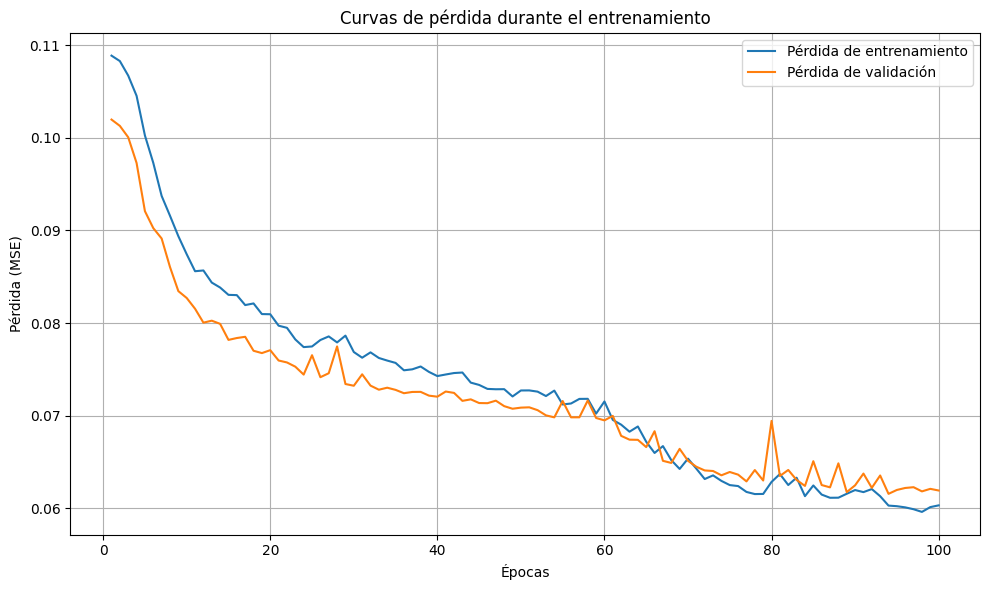

/var/tmp/ipykernel_11042/3887174518.py:95: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load("autoencoder_resnet_best.pth"))



Entrenamiento final sobre todos los datos (3 épocas)...


Fine-tuning Época 1/3: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]


Fine-tuning época [1/3], Pérdida: 0.061621


Fine-tuning Época 2/3: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]


Fine-tuning época [2/3], Pérdida: 0.061652


Fine-tuning Época 3/3: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]


Fine-tuning época [3/3], Pérdida: 0.060614

Modelo final guardado en autoencoder_resnet_codificacion_final.pth


In [103]:


# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Hiperparámetros
batch_size = 128
learning_rate = 0.0001
num_epochs = 100
patience = 10  # Early stopping

# DataLoaders (asegúrate de que X_train_encoder y X_val_encoder están definidos)
train_loader = torch.utils.data.DataLoader(X_train_resnet, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(X_val_resnet, batch_size=batch_size, shuffle=False)

# Crear instancia del Autoencoder
autoencoder = ResNetAutoencoder().to(device)

# Definir función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Variables de control
best_val_loss = float('inf')
epochs_without_improvement = 0

# Para la gráfica
train_losses = []
val_losses = []
scheluder= StepLR(optimizer, step_size=5, gamma=0.5)

# Entrenamiento
print("Entrenando Autoencoder con validación y early stopping...")
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for img in tqdm(train_loader, desc=f"Época {epoch+1}/{num_epochs}"):
        images = img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validación
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for img in val_loader:
            images = img.to(device)
            outputs = autoencoder(images)
            loss = criterion(outputs, images)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheluder.step

    print(f"Época [{epoch+1}/{num_epochs}], Pérdida entrenamiento: {train_loss:.6f}, Pérdida validación: {val_loss:.6f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(autoencoder.state_dict(), "autoencoder_best.pth")
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Deteniendo entrenamiento por early stopping (sin mejora en {patience} épocas).")
            break

# Gráfica de pérdidas
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Pérdida de entrenamiento')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Curvas de pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Guardar el modelo mejor
torch.save(autoencoder.state_dict(), "autoencoder_resnet_best.pth")
# Cargar el modelo guardado
autoencoder.load_state_dict(torch.load("autoencoder_resnet_best.pth"))

# Crear nuevo DataLoader con TODO el conjunto de entrenamiento y validación
full_dataset = torch.utils.data.ConcatDataset([X_train_resnet, X_val_resnet])
full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Entrenamiento final con todo el conjunto (1-3 épocas recomendadas)
final_epochs = 3
print(f"\nEntrenamiento final sobre todos los datos ({final_epochs} épocas)...")
autoencoder.train()

for epoch in range(final_epochs):
    running_loss = 0.0
    for img in tqdm(full_loader, desc=f"Fine-tuning Época {epoch+1}/{final_epochs}"):
        images = img[0].to(device) if isinstance(img, (tuple, list)) else img.to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Fine-tuning época [{epoch+1}/{final_epochs}], Pérdida: {running_loss / len(full_loader):.6f}")

# Guardar modelo final ajustado
final_model_path = "autoencoder_resnet_codificacion_final.pth"
torch.save(autoencoder.state_dict(), final_model_path)
print(f"\nModelo final guardado en {final_model_path}")




In [104]:
# ==========================
# Cargar modelo y evaluar solo el Encoder
# ==========================

# Cargar el modelo entrenado
model = ResNetAutoencoder()
model.load_state_dict(torch.load("autoencoder_resnet_codificacion_final.pth"))
model.eval()  # Modo evaluación

# Extraer solo el encoder
encoder = model.encoder
encoder.to(device)
encoder.eval()



# Lista para almacenar los embeddings
embeddings = []
labels=[]
indices=[]
for img, label, idx in tqdm(total_dataset):
    with torch.no_grad():
        emb = encoder(img.unsqueeze(0).to(device))
    emb = emb.squeeze().cpu().numpy()
    embeddings.append(emb)
    labels.append(label)
    indices.append(idx)

# Procesar todas las imágenes en el dataset externo
print("Extrayendo embeddings...")


import pandas as pd
import numpy as np

# Crear DataFrame con todo
df_embeddings = pd.DataFrame(embeddings)
df_embeddings["label"] = labels
df_embeddings["index"] = indices

# Ordenar por el índice original del DataFrame
df_embeddings_sorted = df_embeddings.sort_values("index").set_index("index")

# Opcional: asegurarse de que alinea con df
df_embeddings_sorted = df_embeddings_sorted.reindex(df.index)

df_embeddings_sorted=df_embeddings_sorted[1:]

# Guardar
df_embeddings_sorted.to_csv("dataset_embeddings_encoder_resnet.csv")

/var/tmp/ipykernel_11042/123725328.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("autoencoder_resnet_codificacion_final.pth"))
100%|██

Extrayendo embeddings...
